In [1]:
# Povezava do vira podatkovne zbirke: https://podatki.gov.si/dataset/surs0711535s

In [2]:
import warnings
warnings.simplefilter("ignore", category = FutureWarning)

# Uvozimo vse potrebne knjižnice
import pandas as pd
import matplotlib.pyplot as plt

# OPOMBE:
# Najprej smo opravili osnovno transformacijo podatkov s pomočjo programa PX-Win
# (izbor podatkov, transformacijo vrstic in stolpcev)
# Datoteko smo shranili kot .csv, ki ima podatke ločene z ';'
# V Excelu smo ustrezno nadomestili šumnike (Š –> S, Č –> C, Ž –> Z)

# Uvozimo .csv datoteko, ki za delimiter uporablja ';'
neto_placa = pd.read_csv("../../podatki/neto_placa/neto_placa.csv", sep = ";")

# Opravimo pretvorbo imen stolpcev v velike črke
neto_placa.columns = neto_placa.columns.str.upper()

# Pretvorimo vse stolpce v tip integer
neto_placa = neto_placa.astype(int)

In [3]:
# Pregled urejenih in filtriranih podatkov
neto_placa
# Za celoten prikaz glej filtered_neto_placa.csv

,RAZRED NETO,2009 SLOVENIJA SPOL - SKUPAJ,2009 SLOVENIJA MOSKI,2009 SLOVENIJA ZENSKE,2009 POMURSKA SPOL - SKUPAJ,2009 POMURSKA MOSKI,2009 POMURSKA ZENSKE,2009 PODRAVSKA SPOL - SKUPAJ,2009 PODRAVSKA MOSKI,2009 PODRAVSKA ZENSKE,...,2020 GORENJSKA ZENSKE,2020 PRIMORSKO-NOTRANJSKA SPOL - SKUPAJ,2020 PRIMORSKO-NOTRANJSKA MOSKI,2020 PRIMORSKO-NOTRANJSKA ZENSKE,2020 GORISKA SPOL - SKUPAJ,2020 GORISKA MOSKI,2020 GORISKA ZENSKE,2020 OBALNO-KRASKA SPOL - SKUPAJ,2020 OBALNO-KRASKA MOSKI,2020 OBALNO-KRASKA ZENSKE
0,1,29563,17457,12106,923,524,399,4686,2262,2424,...,965,533,290,243,1249,709,540,1668,959,709
1,2,29687,14822,14865,1536,664,872,4595,2017,2578,...,1089,684,376,308,1382,751,631,1724,968,756
2,3,29997,13707,16290,1702,783,919,5099,2289,2810,...,1324,689,316,373,1502,683,819,1652,835,817
3,4,30012,14010,16002,1553,850,703,4995,2323,2672,...,1399,717,302,415,1818,751,1067,1640,749,891
4,5,29430,15477,13953,1334,850,484,4500,2460,2040,...,1307,723,366,357,1825,876,949,1535,759,776
5,6,29677,16959,12718,1466,995,471,4470,2621,1849,...,1300,689,372,317,1805,1022,783,1430,802,628
6,7,29879,17813,12066,1524,1077,447,4604,2867,1737,...,1201,670,408,262,1724,1051,673,1503,878,625
7,8,30186,18772,11414,1521,1053,468,4948,3221,1727,...,1100,598,406,192,1691,1004,687,1427,855,572
8,9,29995,19089,10906,1464,996,468,4724,3171,1553,...,1077,597,383,214,1713,1042,671,1402,844,558
9,10,29405,18634,10771,1334,888,446,4353,2888,1465,...,1064,591,361,230,1724,1022,702,1416,798,618


In [4]:
# Pretvorba v .xlsx datoteko
# neto_placa.to_excel("filtered_neto_placa.xlsx")

In [5]:
# Razdelimo ogromno število stolpcev na manjše "obvladljive" celote, ki so medsebojno povezane
# in jih bomo posledično lažje analizirali

In [6]:
neto_razredi = neto_placa.filter(like="RAZRED NETO")
# Izberemo zgolj ustrezne stolpce
moski_pomurska = neto_placa.loc[:, neto_placa.columns.str.contains('POMURSKA') & neto_placa.columns.str.contains('MOSKI')]
# Za lepše poimenovanje legende pri grafu odstranimo nepotrebno besedilo iz imen stolpcev
moski_pomurska = moski_pomurska.rename(columns=lambda x: x.replace('MOSKI', ''))
moski_pomurska = moski_pomurska.rename(columns=lambda x: x.replace('POMURSKA', ''))

moski_pomurska

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,524,510,485,574,553,500,521,480,457,416,477,463
1,664,700,604,556,592,470,502,503,535,587,548,514
2,783,910,798,851,786,718,670,695,628,595,613,602
3,850,934,827,822,689,745,730,725,729,734,677,740
4,850,949,905,807,920,882,813,793,925,922,828,773
5,995,1017,915,938,954,1012,940,984,1017,932,960,938
6,1077,925,945,920,938,872,916,977,985,934,980,995
7,1053,960,893,874,920,911,882,872,858,863,1002,1006
8,996,841,806,817,887,793,794,806,785,796,843,949
9,888,783,761,742,734,732,755,781,748,781,868,786


<dtype: 'uint8'>


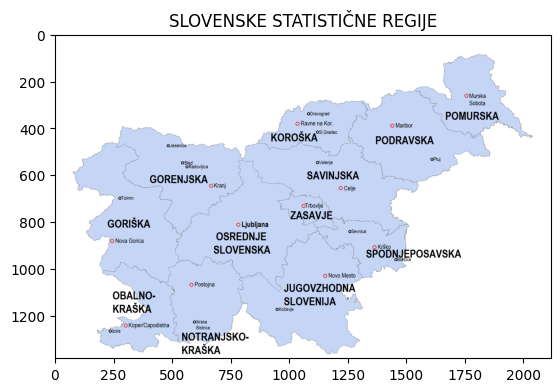

In [7]:
from warnings import filterwarnings
import tensorflow as tf
from tensorflow import io
from tensorflow import image
from matplotlib import pyplot as plt
 
filterwarnings("ignore") 
tf_img = io.read_file("../../slike/statisticne_regije.png")
tf_img = image.decode_png(tf_img, channels=3)
print(tf_img.dtype)
plt.title("SLOVENSKE STATISTIČNE REGIJE")
plt.imshow(tf_img)

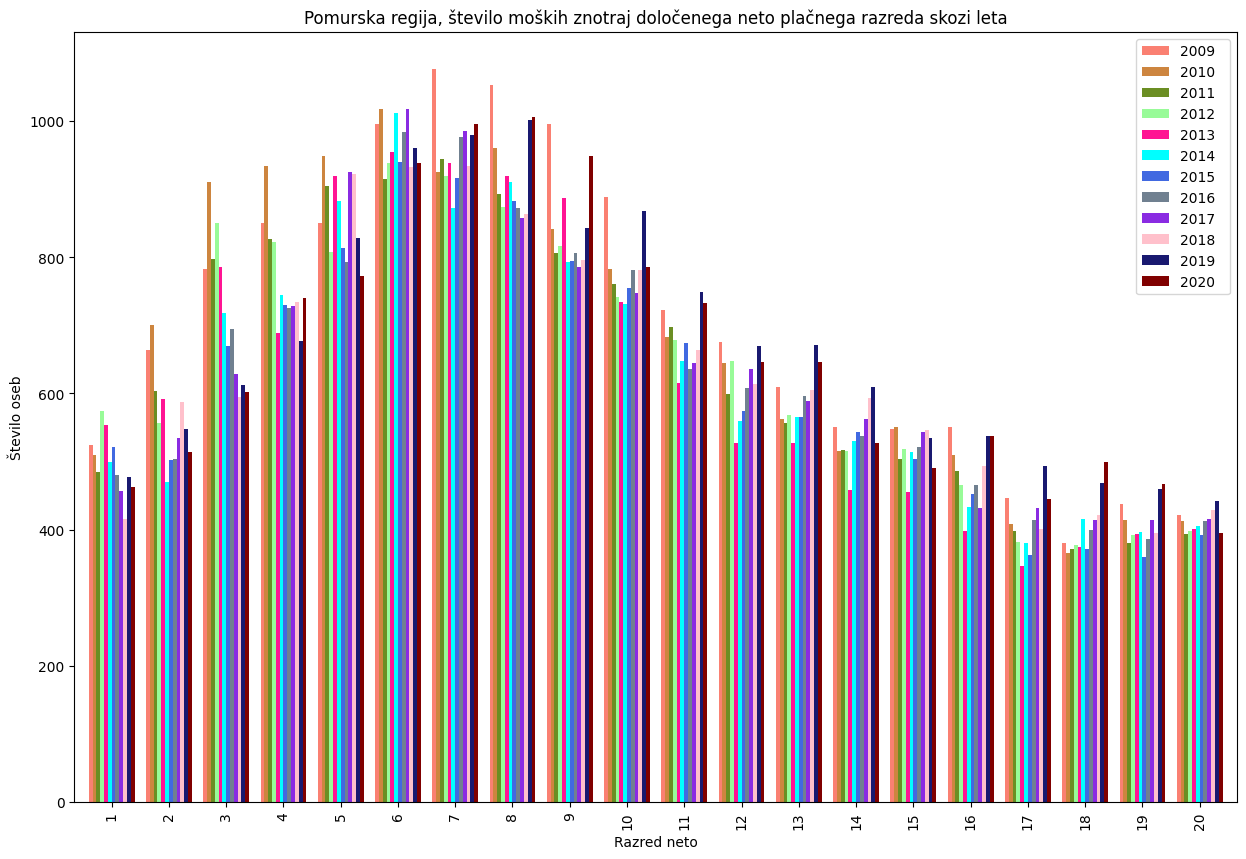

In [8]:
ax = moski_pomurska.plot(kind='bar', figsize=(15, 10), width = 0.8, color = ["salmon", "peru", "olivedrab", "palegreen", "deeppink"
                                                                            , "aqua", "royalblue", "slategray", "blueviolet",
                                                                            "pink", "midnightblue", "maroon"])
ax.set_xticklabels(neto_razredi['RAZRED NETO'])
plt.xlabel('Razred neto')
plt.ylabel('Število oseb')
plt.title("Pomurska regija, število moških znotraj določenega neto plačnega razreda skozi leta")
plt.show()

In [9]:
neto_razredi = neto_placa.filter(like="RAZRED NETO")
# Izberemo zgolj ustrezne stolpce
zenske_pomurska = neto_placa.loc[:, neto_placa.columns.str.contains('POMURSKA') & neto_placa.columns.str.contains('ZENSKE')]
# Za lepše poimenovanje legende pri grafu odstranimo nepotrebno besedilo iz imen stolpcev
zenske_pomurska = zenske_pomurska.rename(columns=lambda x: x.replace('ZENSKE', ''))
zenske_pomurska = zenske_pomurska.rename(columns=lambda x: x.replace('POMURSKA', ''))

zenske_pomurska

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,399,839,735,797,1011,611,712,827,861,923,792,544
1,872,1040,865,979,954,736,846,992,961,1002,935,760
2,919,997,903,1059,1010,834,735,819,842,810,797,989
3,703,743,775,773,745,761,741,803,831,900,869,875
4,484,613,628,670,705,697,675,705,806,827,722,826
5,471,529,506,530,543,537,537,560,571,573,648,657
6,447,511,451,451,432,443,465,471,475,507,552,529
7,468,401,383,396,404,431,411,414,417,481,515,478
8,468,441,394,426,457,455,392,423,402,438,460,473
9,446,512,471,441,468,435,435,436,460,440,439,464


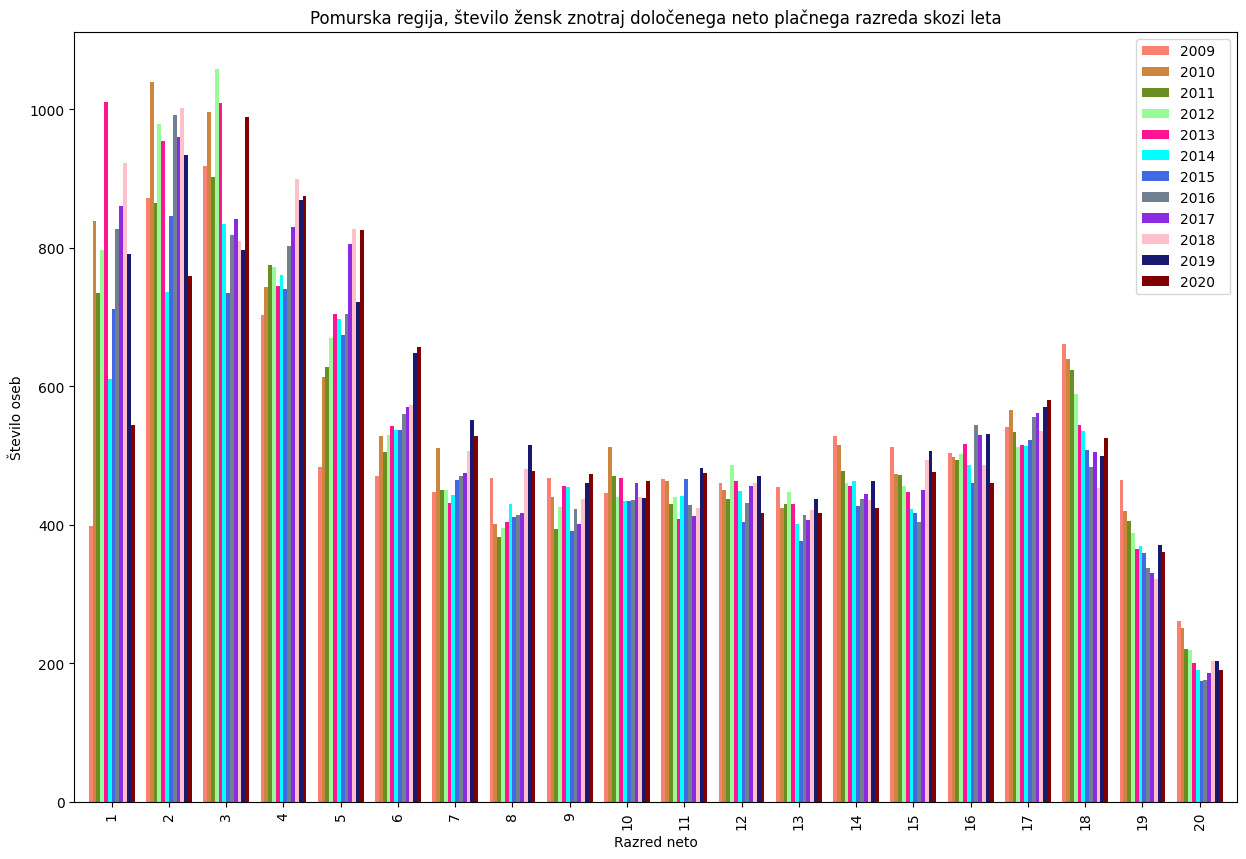

In [10]:
ax = zenske_pomurska.plot(kind='bar', figsize=(15, 10), width = 0.8, color = ["salmon", "peru", "olivedrab", "palegreen", "deeppink"
                                                                            , "aqua", "royalblue", "slategray", "blueviolet",
                                                                            "pink", "midnightblue", "maroon"])
ax.set_xticklabels(neto_razredi['RAZRED NETO'])
plt.xlabel('Razred neto')
plt.ylabel('Število oseb')
plt.title("Pomurska regija, število žensk znotraj določenega neto plačnega razreda skozi leta")
plt.show()

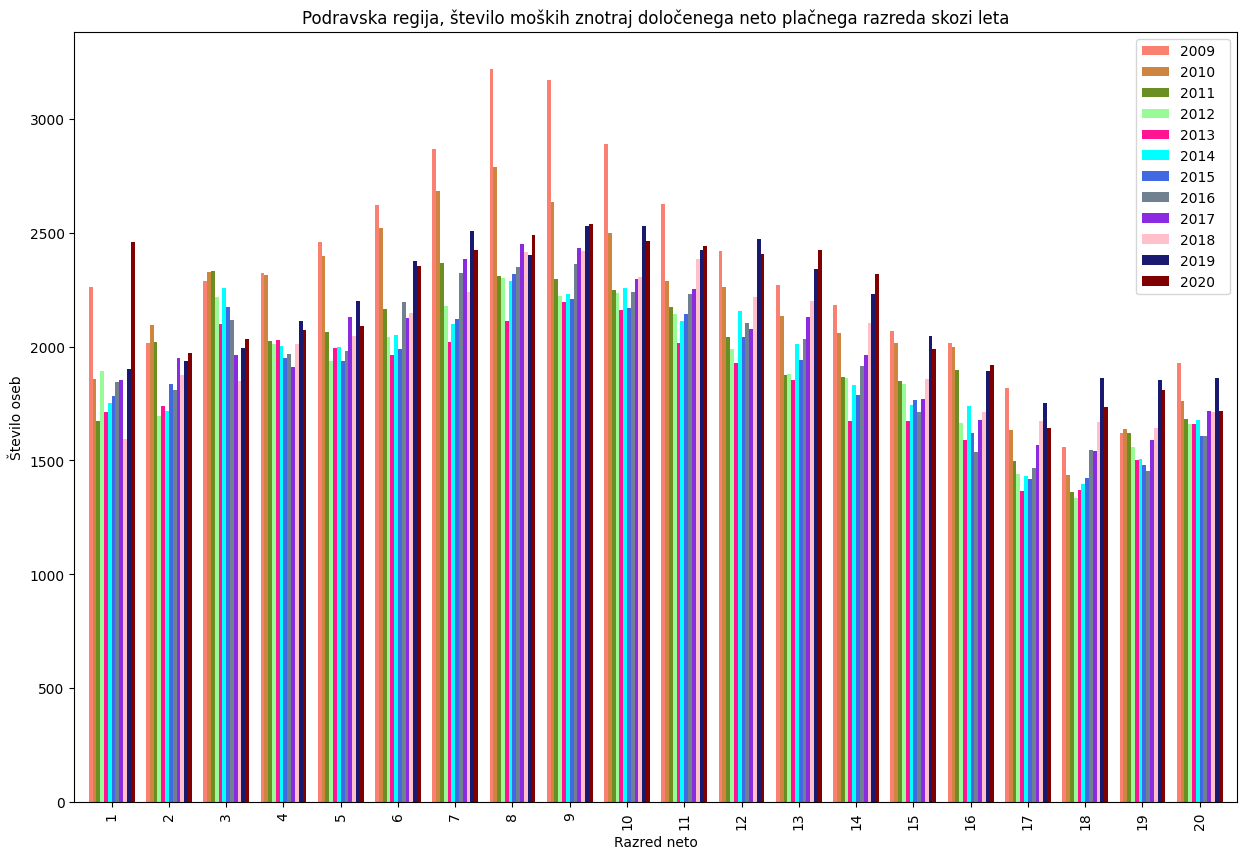

In [11]:
neto_razredi = neto_placa.filter(like="RAZRED NETO")
# Izberemo zgolj ustrezne stolpce
moski_podravska = neto_placa.loc[:, neto_placa.columns.str.contains('PODRAVSKA') & neto_placa.columns.str.contains('MOSKI')]
# Za lepše poimenovanje legende pri grafu odstranimo nepotrebno besedilo iz imen stolpcev
moski_podravska = moski_podravska.rename(columns=lambda x: x.replace('MOSKI', ''))
moski_podravska = moski_podravska.rename(columns=lambda x: x.replace('PODRAVSKA', ''))

ax = moski_podravska.plot(kind='bar', figsize=(15, 10), width = 0.8, color = ["salmon", "peru", "olivedrab", "palegreen", "deeppink"
                                                                            , "aqua", "royalblue", "slategray", "blueviolet",
                                                                            "pink", "midnightblue", "maroon"])
ax.set_xticklabels(neto_razredi['RAZRED NETO'])
plt.xlabel('Razred neto')
plt.ylabel('Število oseb')
plt.title("Podravska regija, število moških znotraj določenega neto plačnega razreda skozi leta")
plt.show()

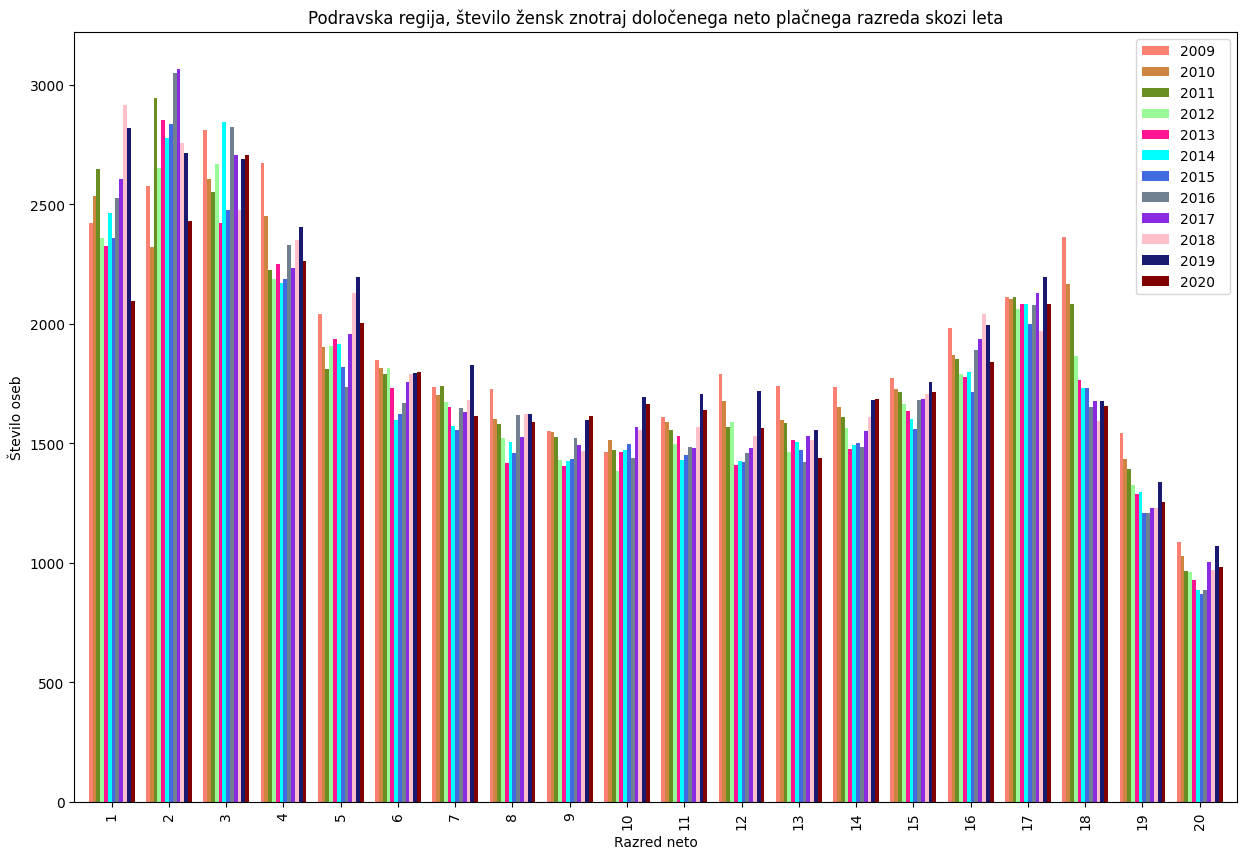

In [12]:
neto_razredi = neto_placa.filter(like="RAZRED NETO")
# Izberemo zgolj ustrezne stolpce
zenske_podravska = neto_placa.loc[:, neto_placa.columns.str.contains('PODRAVSKA') & neto_placa.columns.str.contains('ZENSKE')]
# Za lepše poimenovanje legende pri grafu odstranimo nepotrebno besedilo iz imen stolpcev
zenske_podravska = zenske_podravska.rename(columns=lambda x: x.replace('ZENSKE', ''))
zenske_podravska = zenske_podravska.rename(columns=lambda x: x.replace('PODRAVSKA', ''))

ax = zenske_podravska.plot(kind='bar', figsize=(15, 10), width = 0.8, color = ["salmon", "peru", "olivedrab", "palegreen", "deeppink"
                                                                            , "aqua", "royalblue", "slategray", "blueviolet",
                                                                            "pink", "midnightblue", "maroon"])
ax.set_xticklabels(neto_razredi['RAZRED NETO'])
plt.xlabel('Razred neto')
plt.ylabel('Število oseb')
plt.title("Podravska regija, število žensk znotraj določenega neto plačnega razreda skozi leta")
plt.show()

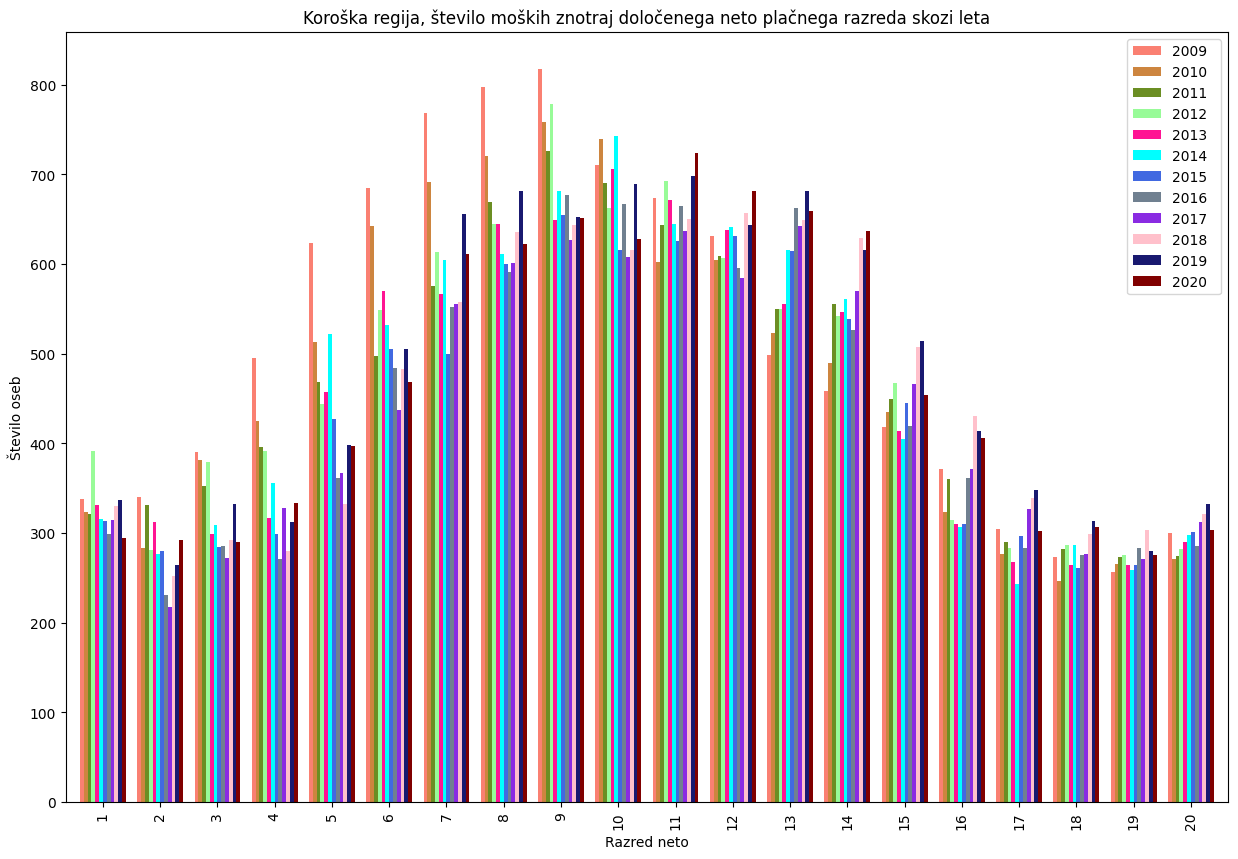

In [13]:
neto_razredi = neto_placa.filter(like="RAZRED NETO")
# Izberemo zgolj ustrezne stolpce
moski_koroska = neto_placa.loc[:, neto_placa.columns.str.contains('KOROSKA') & neto_placa.columns.str.contains('MOSKI')]
# Za lepše poimenovanje legende pri grafu odstranimo nepotrebno besedilo iz imen stolpcev
moski_koroska = moski_koroska.rename(columns=lambda x: x.replace('MOSKI', ''))
moski_koroska = moski_koroska.rename(columns=lambda x: x.replace('KOROSKA', ''))

ax = moski_koroska.plot(kind='bar', figsize=(15, 10), width = 0.8, color = ["salmon", "peru", "olivedrab", "palegreen", "deeppink"
                                                                            , "aqua", "royalblue", "slategray", "blueviolet",
                                                                            "pink", "midnightblue", "maroon"])
ax.set_xticklabels(neto_razredi['RAZRED NETO'])
plt.xlabel('Razred neto')
plt.ylabel('Število oseb')
plt.title("Koroška regija, število moških znotraj določenega neto plačnega razreda skozi leta")
plt.show()

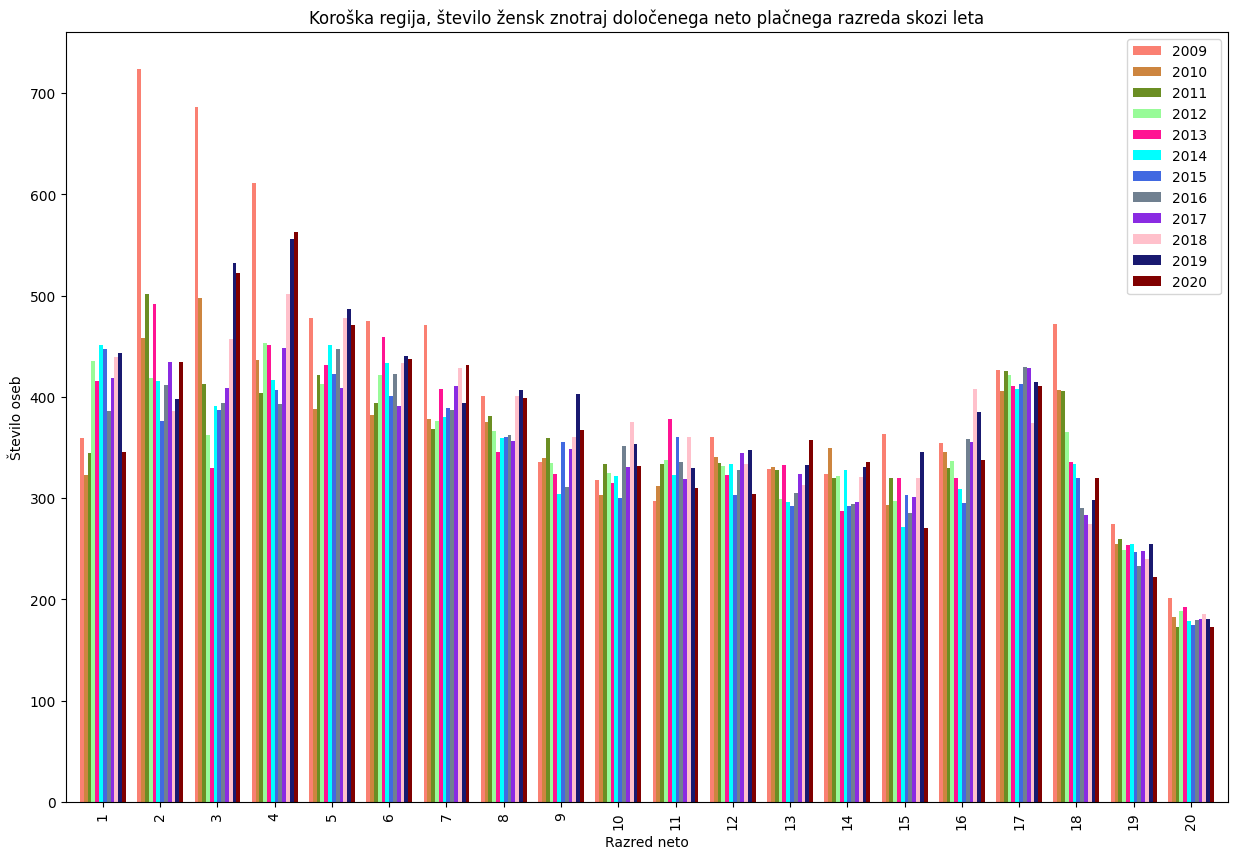

In [14]:
neto_razredi = neto_placa.filter(like="RAZRED NETO")
# Izberemo zgolj ustrezne stolpce
zenske_koroska = neto_placa.loc[:, neto_placa.columns.str.contains('KOROSKA') & neto_placa.columns.str.contains('ZENSKE')]
# Za lepše poimenovanje legende pri grafu odstranimo nepotrebno besedilo iz imen stolpcev
zenske_koroska = zenske_koroska.rename(columns=lambda x: x.replace('ZENSKE', ''))
zenske_koroska = zenske_koroska.rename(columns=lambda x: x.replace('KOROSKA', ''))

ax = zenske_koroska.plot(kind='bar', figsize=(15, 10), width = 0.8, color = ["salmon", "peru", "olivedrab", "palegreen", "deeppink"
                                                                            , "aqua", "royalblue", "slategray", "blueviolet",
                                                                            "pink", "midnightblue", "maroon"])
ax.set_xticklabels(neto_razredi['RAZRED NETO'])
plt.xlabel('Razred neto')
plt.ylabel('Število oseb')
plt.title("Koroška regija, število žensk znotraj določenega neto plačnega razreda skozi leta")
plt.show()

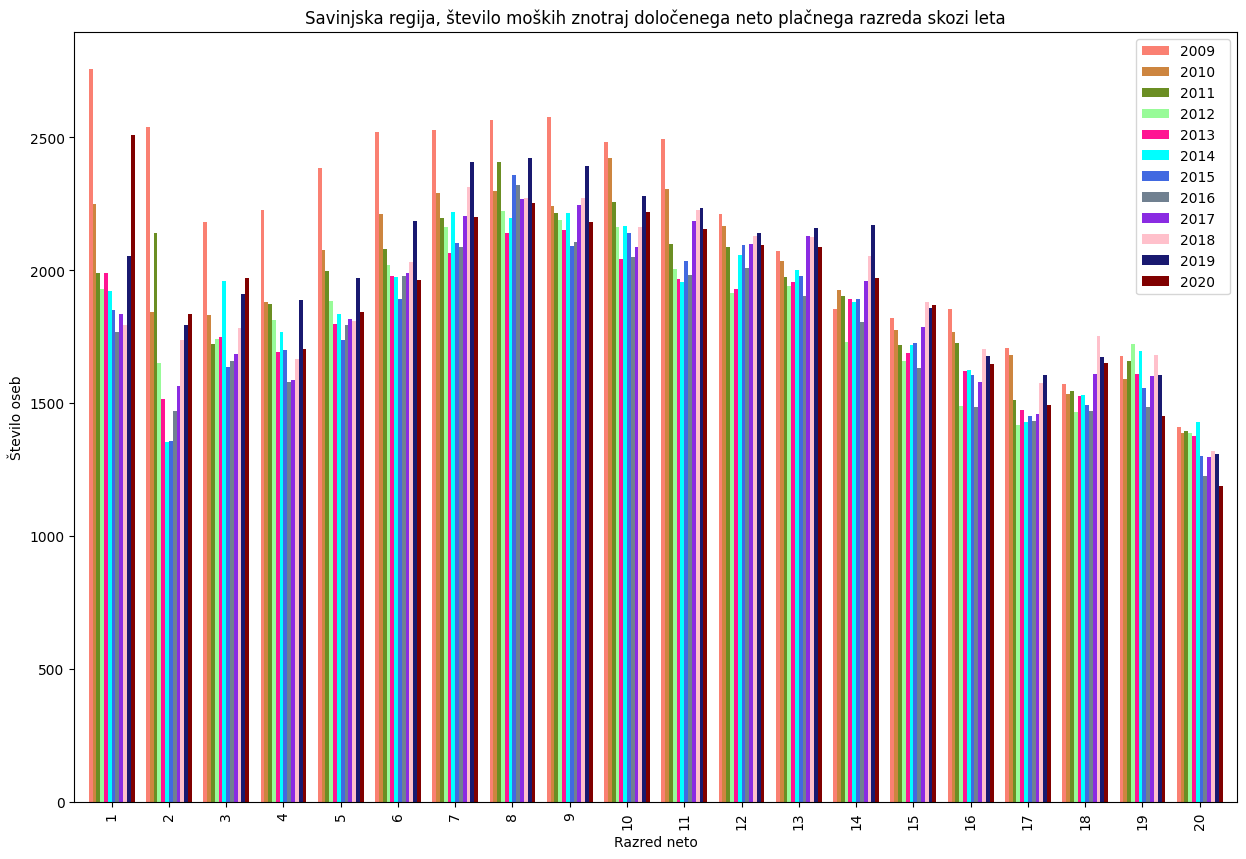

In [15]:
neto_razredi = neto_placa.filter(like="RAZRED NETO")
# Izberemo zgolj ustrezne stolpce
moski_savinjska = neto_placa.loc[:, neto_placa.columns.str.contains('SAVINJSKA') & neto_placa.columns.str.contains('MOSKI')]
# Za lepše poimenovanje legende pri grafu odstranimo nepotrebno besedilo iz imen stolpcev
moski_savinjska = moski_savinjska.rename(columns=lambda x: x.replace('MOSKI', ''))
moski_savinjska = moski_savinjska.rename(columns=lambda x: x.replace('SAVINJSKA', ''))

ax = moski_savinjska.plot(kind='bar', figsize=(15, 10), width = 0.8, color = ["salmon", "peru", "olivedrab", "palegreen", "deeppink"
                                                                            , "aqua", "royalblue", "slategray", "blueviolet",
                                                                            "pink", "midnightblue", "maroon"])
ax.set_xticklabels(neto_razredi['RAZRED NETO'])
plt.xlabel('Razred neto')
plt.ylabel('Število oseb')
plt.title("Savinjska regija, število moških znotraj določenega neto plačnega razreda skozi leta")
plt.show()

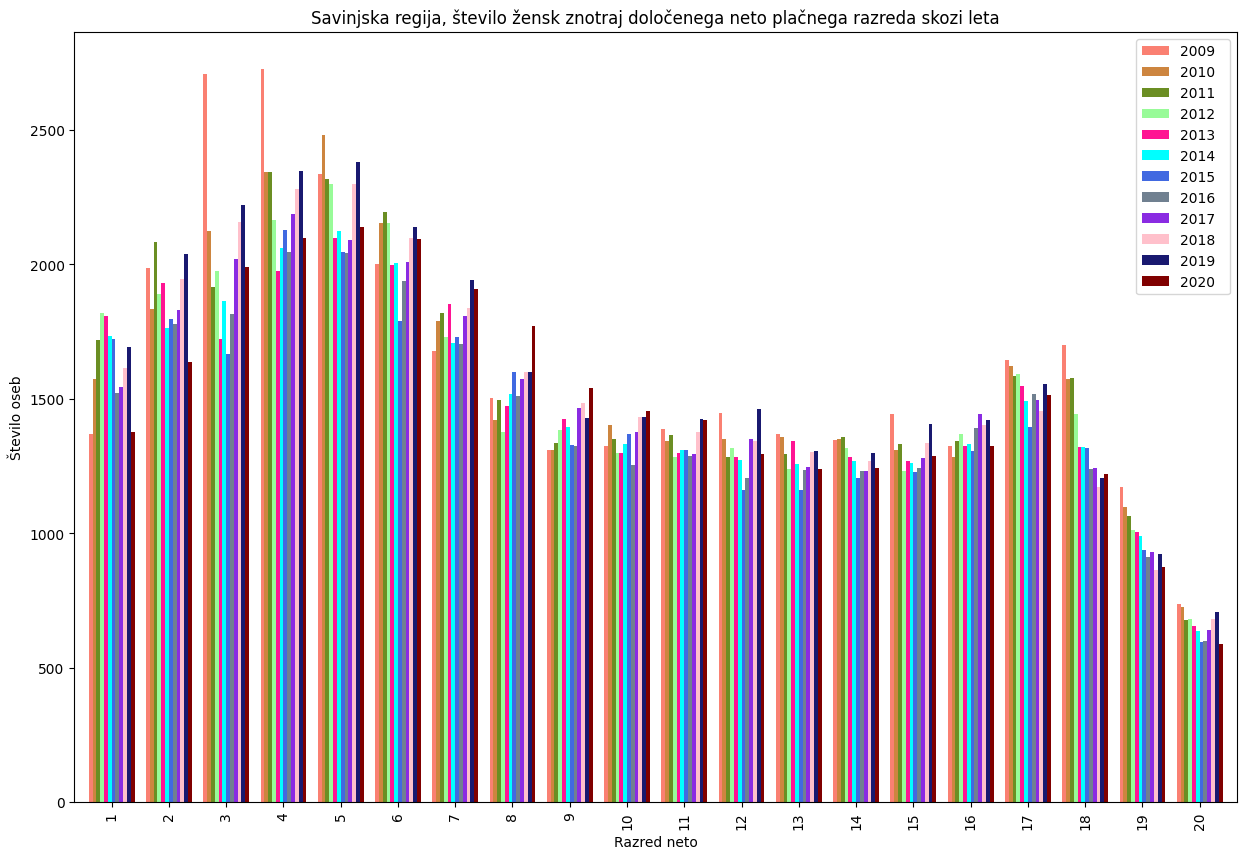

In [16]:
neto_razredi = neto_placa.filter(like="RAZRED NETO")
# Izberemo zgolj ustrezne stolpce
zenske_savinjska = neto_placa.loc[:, neto_placa.columns.str.contains('SAVINJSKA') & neto_placa.columns.str.contains('ZENSKE')]
# Za lepše poimenovanje legende pri grafu odstranimo nepotrebno besedilo iz imen stolpcev
zenske_savinjska = zenske_savinjska.rename(columns=lambda x: x.replace('ZENSKE', ''))
zenske_savinjska = zenske_savinjska.rename(columns=lambda x: x.replace('SAVINJSKA', ''))

ax = zenske_savinjska.plot(kind='bar', figsize=(15, 10), width = 0.8, color = ["salmon", "peru", "olivedrab", "palegreen", "deeppink"
                                                                            , "aqua", "royalblue", "slategray", "blueviolet",
                                                                            "pink", "midnightblue", "maroon"])
ax.set_xticklabels(neto_razredi['RAZRED NETO'])
plt.xlabel('Razred neto')
plt.ylabel('Število oseb')
plt.title("Savinjska regija, število žensk znotraj določenega neto plačnega razreda skozi leta")
plt.show()

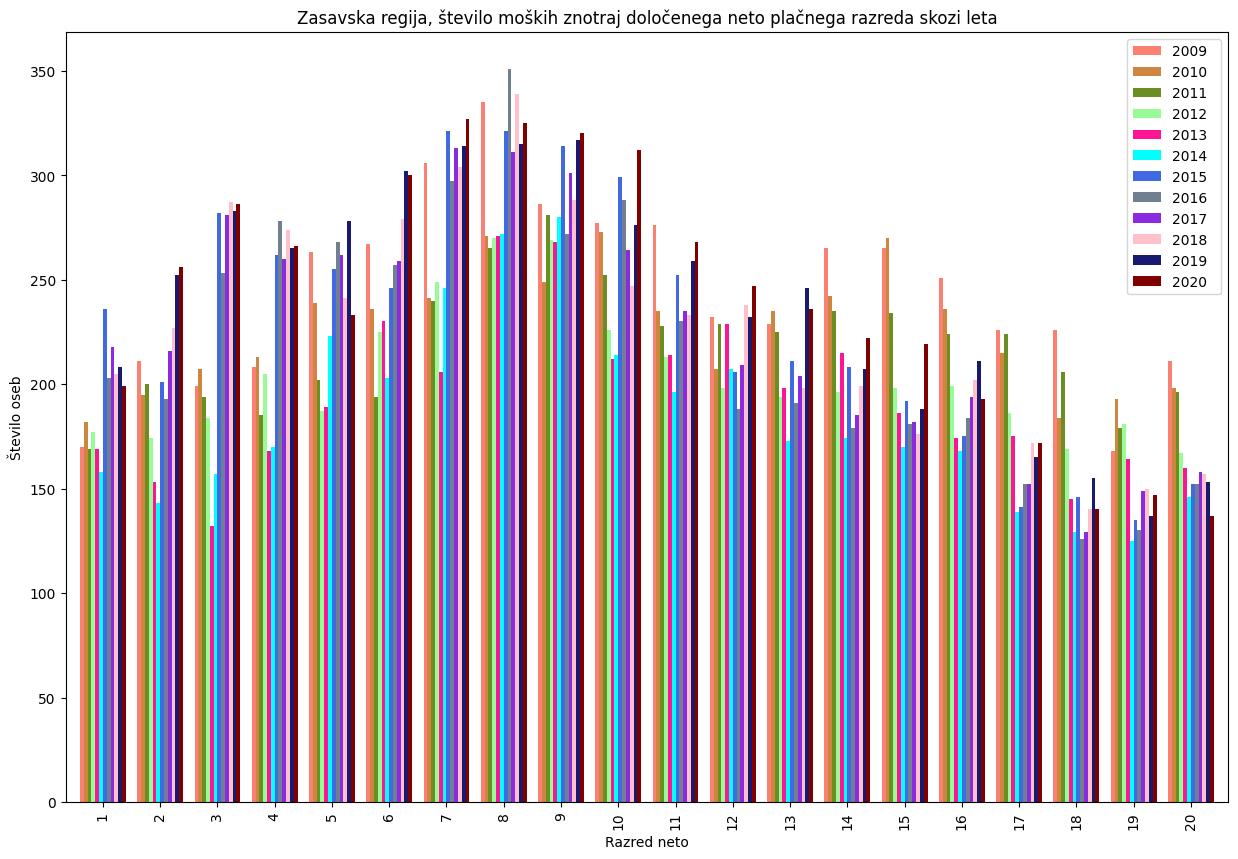

In [17]:
neto_razredi = neto_placa.filter(like="RAZRED NETO")
# Izberemo zgolj ustrezne stolpce
moski_zasavska = neto_placa.loc[:, neto_placa.columns.str.contains('ZASAVSKA') & neto_placa.columns.str.contains('MOSKI')]
# Za lepše poimenovanje legende pri grafu odstranimo nepotrebno besedilo iz imen stolpcev
moski_zasavska = moski_zasavska.rename(columns=lambda x: x.replace('MOSKI', ''))
moski_zasavska = moski_zasavska.rename(columns=lambda x: x.replace('ZASAVSKA', ''))

ax = moski_zasavska.plot(kind='bar', figsize=(15, 10), width = 0.8, color = ["salmon", "peru", "olivedrab", "palegreen", "deeppink"
                                                                            , "aqua", "royalblue", "slategray", "blueviolet",
                                                                            "pink", "midnightblue", "maroon"])
ax.set_xticklabels(neto_razredi['RAZRED NETO'])
plt.xlabel('Razred neto')
plt.ylabel('Število oseb')
plt.title("Zasavska regija, število moških znotraj določenega neto plačnega razreda skozi leta")
plt.show()

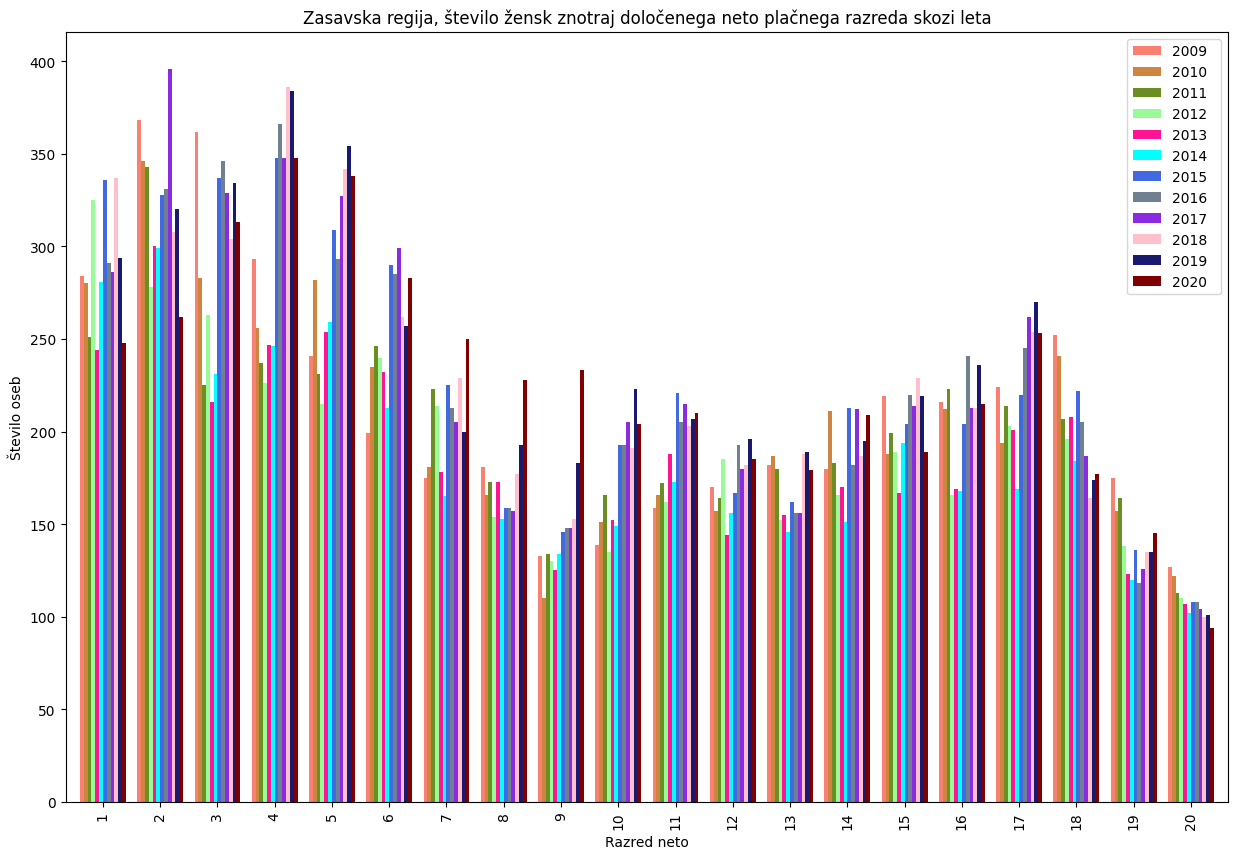

In [18]:
neto_razredi = neto_placa.filter(like="RAZRED NETO")
# Izberemo zgolj ustrezne stolpce
zenske_zasavska = neto_placa.loc[:, neto_placa.columns.str.contains('ZASAVSKA') & neto_placa.columns.str.contains('ZENSKE')]
# Za lepše poimenovanje legende pri grafu odstranimo nepotrebno besedilo iz imen stolpcev
zenske_zasavska = zenske_zasavska.rename(columns=lambda x: x.replace('ZENSKE', ''))
zenske_zasavska = zenske_zasavska.rename(columns=lambda x: x.replace('ZASAVSKA', ''))

ax = zenske_zasavska.plot(kind='bar', figsize=(15, 10), width = 0.8, color = ["salmon", "peru", "olivedrab", "palegreen", "deeppink"
                                                                            , "aqua", "royalblue", "slategray", "blueviolet",
                                                                            "pink", "midnightblue", "maroon"])
ax.set_xticklabels(neto_razredi['RAZRED NETO'])
plt.xlabel('Razred neto')
plt.ylabel('Število oseb')
plt.title("Zasavska regija, število žensk znotraj določenega neto plačnega razreda skozi leta")
plt.show()

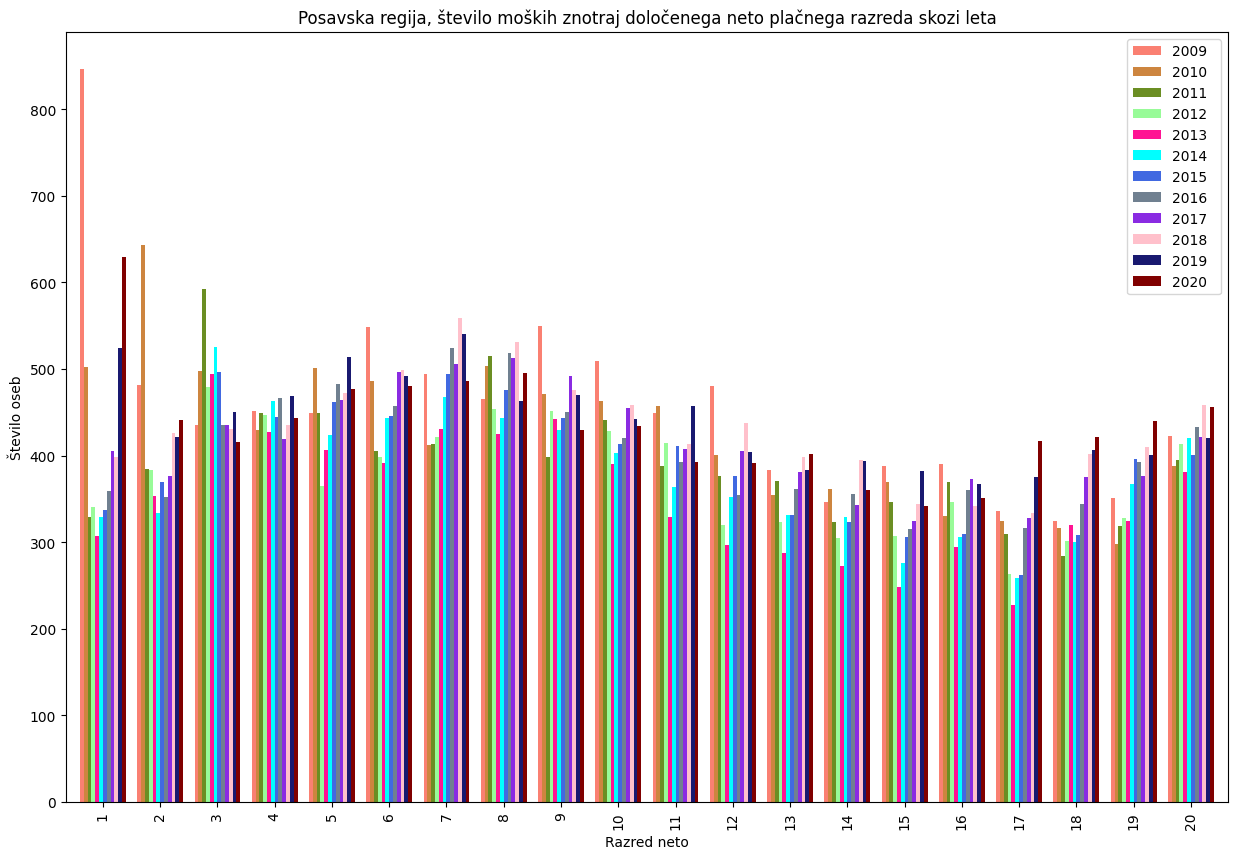

In [19]:
neto_razredi = neto_placa.filter(like="RAZRED NETO")
# Izberemo zgolj ustrezne stolpce
moski_posavska = neto_placa.loc[:, neto_placa.columns.str.contains('POSAVSKA') & neto_placa.columns.str.contains('MOSKI')]
# Za lepše poimenovanje legende pri grafu odstranimo nepotrebno besedilo iz imen stolpcev
moski_posavska = moski_posavska.rename(columns=lambda x: x.replace('MOSKI', ''))
moski_posavska = moski_posavska.rename(columns=lambda x: x.replace('POSAVSKA', ''))

ax = moski_posavska.plot(kind='bar', figsize=(15, 10), width = 0.8, color = ["salmon", "peru", "olivedrab", "palegreen", "deeppink"
                                                                            , "aqua", "royalblue", "slategray", "blueviolet",
                                                                            "pink", "midnightblue", "maroon"])
ax.set_xticklabels(neto_razredi['RAZRED NETO'])
plt.xlabel('Razred neto')
plt.ylabel('Število oseb')
plt.title("Posavska regija, število moških znotraj določenega neto plačnega razreda skozi leta")
plt.show()

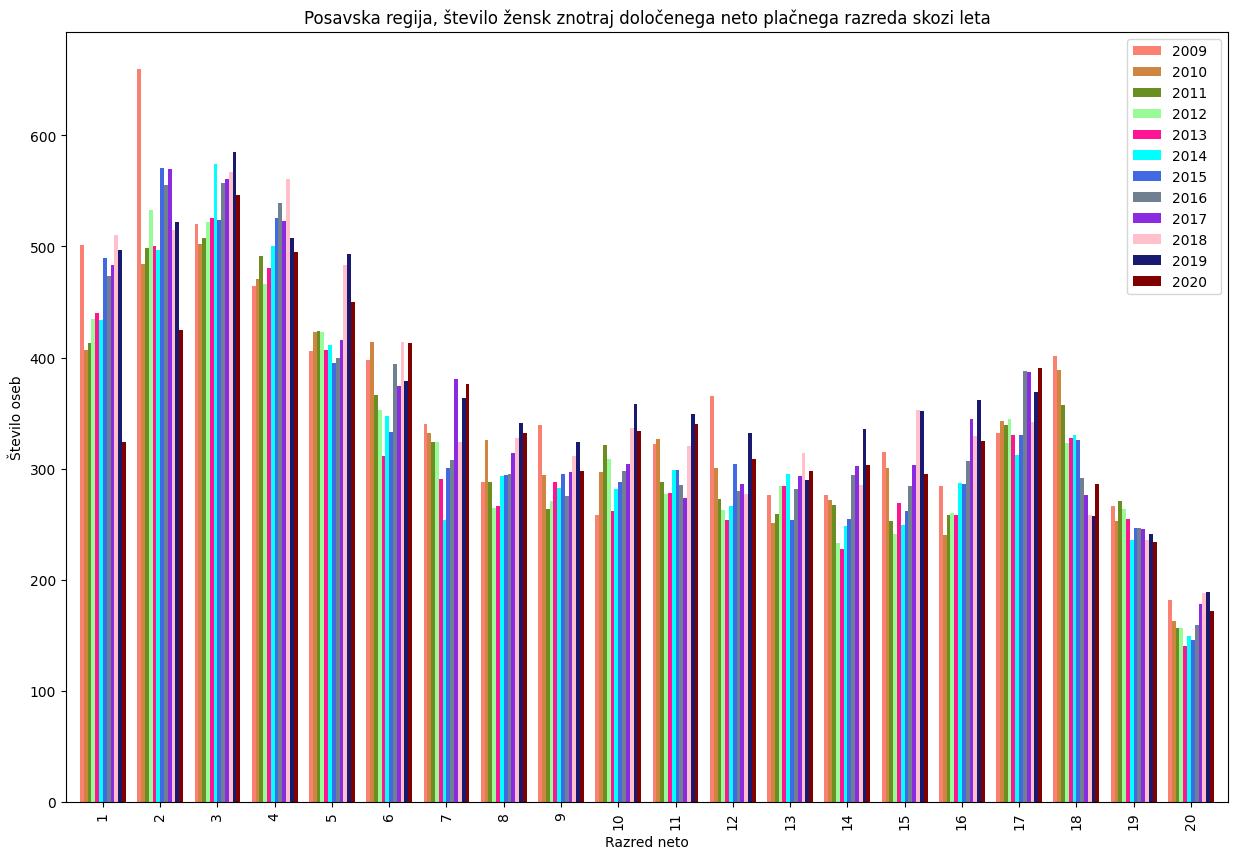

In [20]:
neto_razredi = neto_placa.filter(like="RAZRED NETO")
# Izberemo zgolj ustrezne stolpce
zenske_posavska = neto_placa.loc[:, neto_placa.columns.str.contains('POSAVSKA') & neto_placa.columns.str.contains('ZENSKE')]
# Za lepše poimenovanje legende pri grafu odstranimo nepotrebno besedilo iz imen stolpcev
zenske_posavska = zenske_posavska.rename(columns=lambda x: x.replace('ZENSKE', ''))
zenske_posavska = zenske_posavska.rename(columns=lambda x: x.replace('POSAVSKA', ''))

ax = zenske_posavska.plot(kind='bar', figsize=(15, 10), width = 0.8, color = ["salmon", "peru", "olivedrab", "palegreen", "deeppink"
                                                                            , "aqua", "royalblue", "slategray", "blueviolet",
                                                                            "pink", "midnightblue", "maroon"])
ax.set_xticklabels(neto_razredi['RAZRED NETO'])
plt.xlabel('Razred neto')
plt.ylabel('Število oseb')
plt.title("Posavska regija, število žensk znotraj določenega neto plačnega razreda skozi leta")
plt.show()

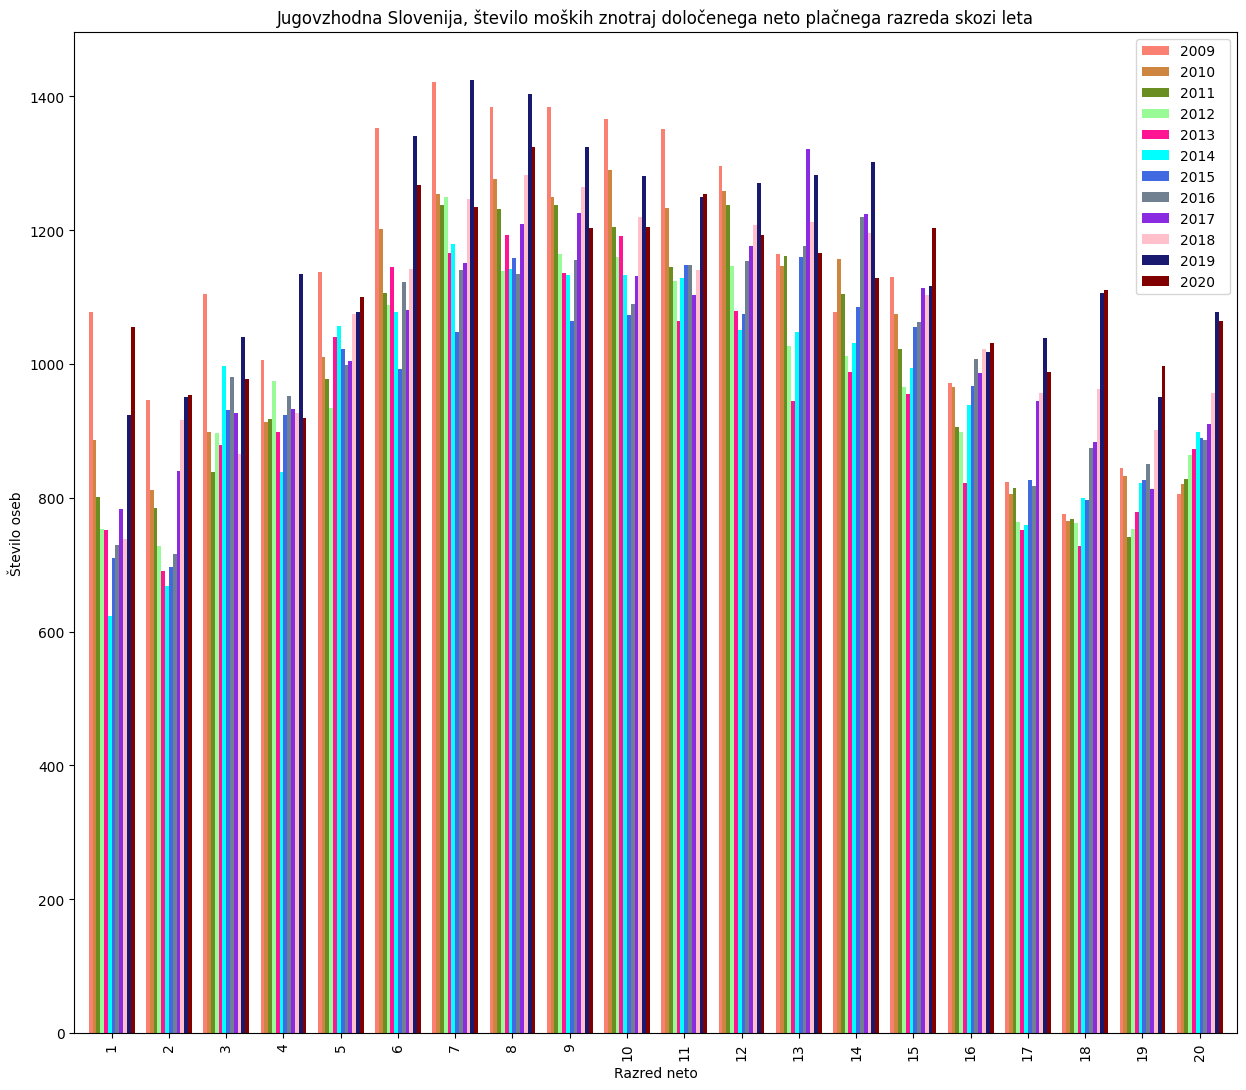

In [21]:
neto_razredi = neto_placa.filter(like="RAZRED NETO")
# Izberemo zgolj ustrezne stolpce
moski_jugovzhodna = neto_placa.loc[:, neto_placa.columns.str.contains('JUGOVZHODNA SLOVENIJA') & neto_placa.columns.str.contains('MOSKI')]
# Za lepše poimenovanje legende pri grafu odstranimo nepotrebno besedilo iz imen stolpcev
moski_jugovzhodna = moski_jugovzhodna.rename(columns=lambda x: x.replace('MOSKI', ''))
moski_jugovzhodna = moski_jugovzhodna.rename(columns=lambda x: x.replace('JUGOVZHODNA SLOVENIJA', ''))

ax = moski_jugovzhodna.plot(kind='bar', figsize=(15, 13), width = 0.8, color = ["salmon", "peru", "olivedrab", "palegreen", "deeppink"
                                                                            , "aqua", "royalblue", "slategray", "blueviolet",
                                                                            "pink", "midnightblue", "maroon"])
ax.set_xticklabels(neto_razredi['RAZRED NETO'])
plt.xlabel('Razred neto')
plt.ylabel('Število oseb')
plt.title("Jugovzhodna Slovenija, število moških znotraj določenega neto plačnega razreda skozi leta")
plt.show()

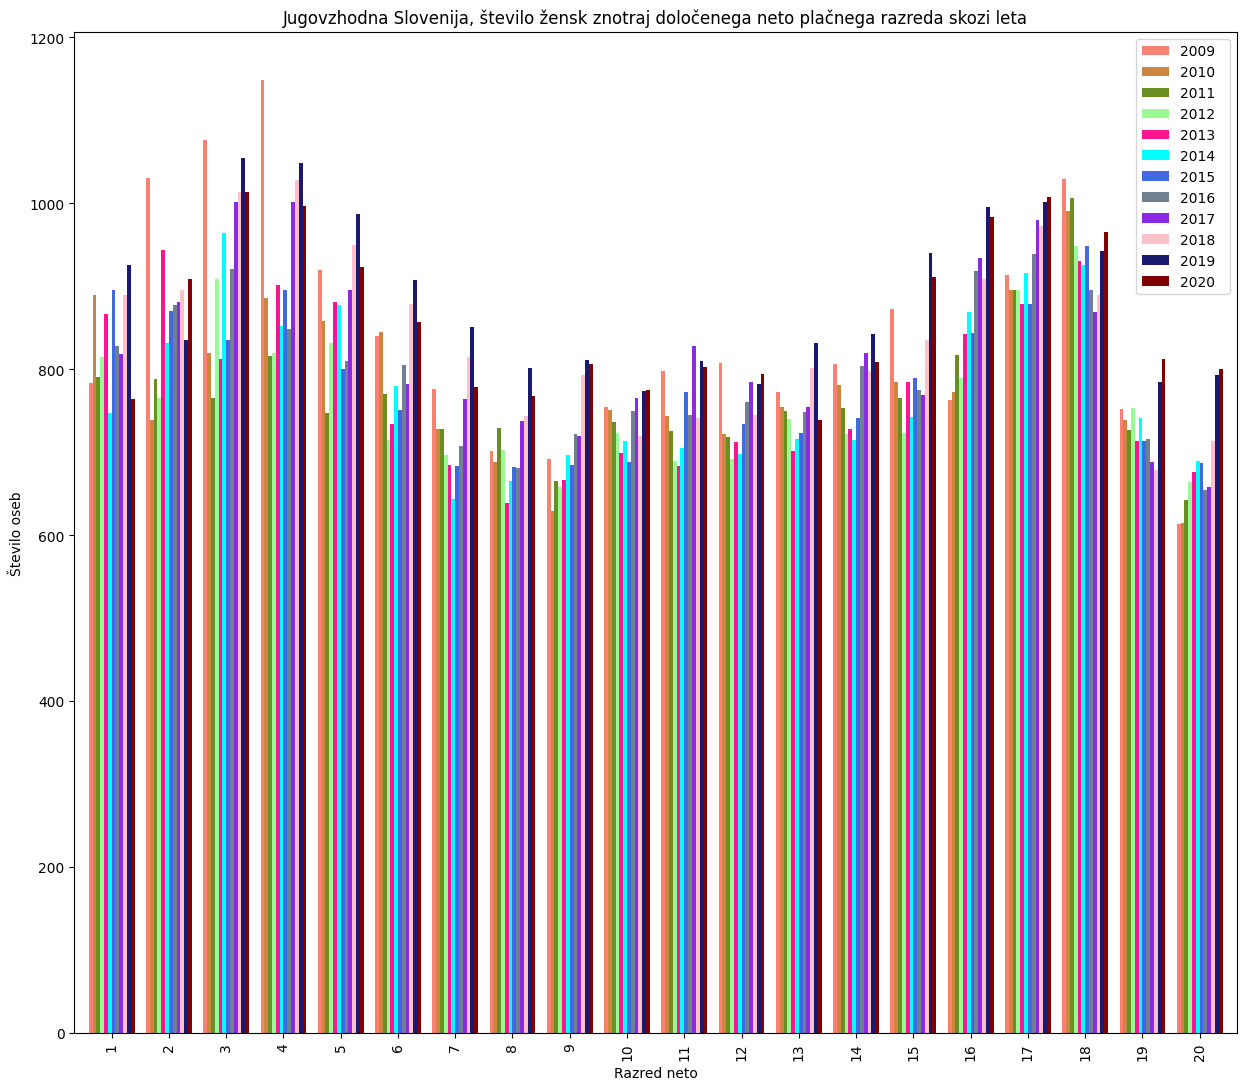

In [22]:
neto_razredi = neto_placa.filter(like="RAZRED NETO")
# Izberemo zgolj ustrezne stolpce
zenske_jugovzhodna = neto_placa.loc[:, neto_placa.columns.str.contains('JUGOVZHODNA SLOVENIJA') & neto_placa.columns.str.contains('ZENSKE')]
# Za lepše poimenovanje legende pri grafu odstranimo nepotrebno besedilo iz imen stolpcev
zenske_jugovzhodna = zenske_jugovzhodna.rename(columns=lambda x: x.replace('ZENSKE', ''))
zenske_jugovzhodna = zenske_jugovzhodna.rename(columns=lambda x: x.replace('JUGOVZHODNA SLOVENIJA', ''))

ax = zenske_jugovzhodna.plot(kind='bar', figsize=(15, 13), width = 0.8, color = ["salmon", "peru", "olivedrab", "palegreen", "deeppink"
                                                                            , "aqua", "royalblue", "slategray", "blueviolet",
                                                                            "pink", "midnightblue", "maroon"])
ax.set_xticklabels(neto_razredi['RAZRED NETO'])
plt.xlabel('Razred neto')
plt.ylabel('Število oseb')
plt.title("Jugovzhodna Slovenija, število žensk znotraj določenega neto plačnega razreda skozi leta")
plt.show()

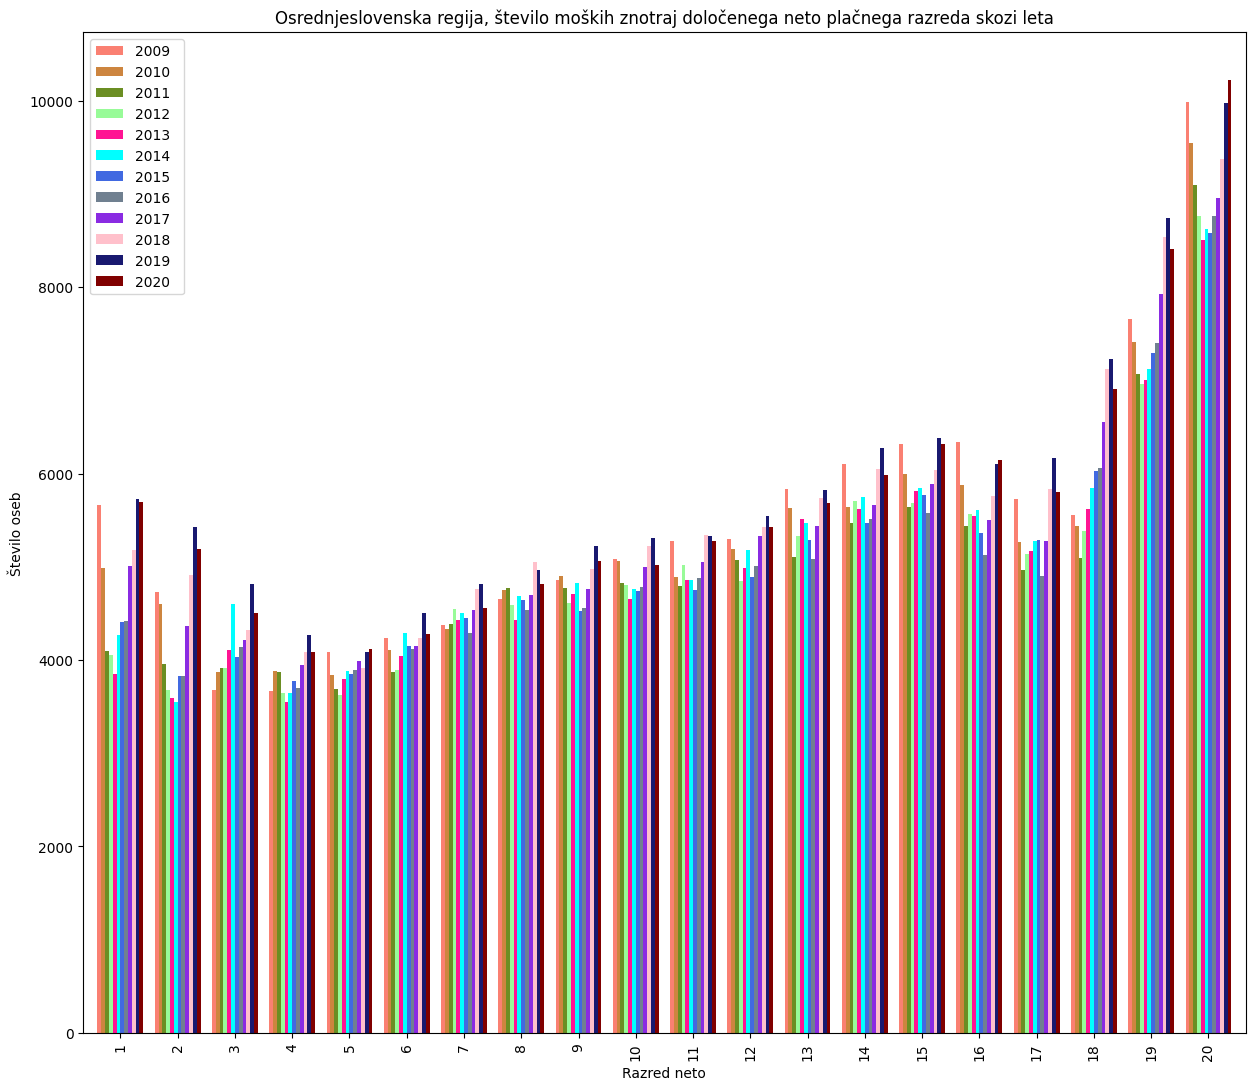

In [23]:
neto_razredi = neto_placa.filter(like="RAZRED NETO")
# Izberemo zgolj ustrezne stolpce
moski_osrednjeslovenska = neto_placa.loc[:, neto_placa.columns.str.contains('OSREDNJESLOVENSKA') & neto_placa.columns.str.contains('MOSKI')]
# Za lepše poimenovanje legende pri grafu odstranimo nepotrebno besedilo iz imen stolpcev
moski_osrednjeslovenska = moski_osrednjeslovenska.rename(columns=lambda x: x.replace('MOSKI', ''))
moski_osrednjeslovenska = moski_osrednjeslovenska.rename(columns=lambda x: x.replace('OSREDNJESLOVENSKA', ''))

ax = moski_osrednjeslovenska.plot(kind='bar', figsize=(15, 13), width = 0.8, color = ["salmon", "peru", "olivedrab", "palegreen", "deeppink"
                                                                            , "aqua", "royalblue", "slategray", "blueviolet",
                                                                            "pink", "midnightblue", "maroon"])
ax.set_xticklabels(neto_razredi['RAZRED NETO'])
plt.xlabel('Razred neto')
plt.ylabel('Število oseb')
plt.title("Osrednjeslovenska regija, število moških znotraj določenega neto plačnega razreda skozi leta")
plt.show()

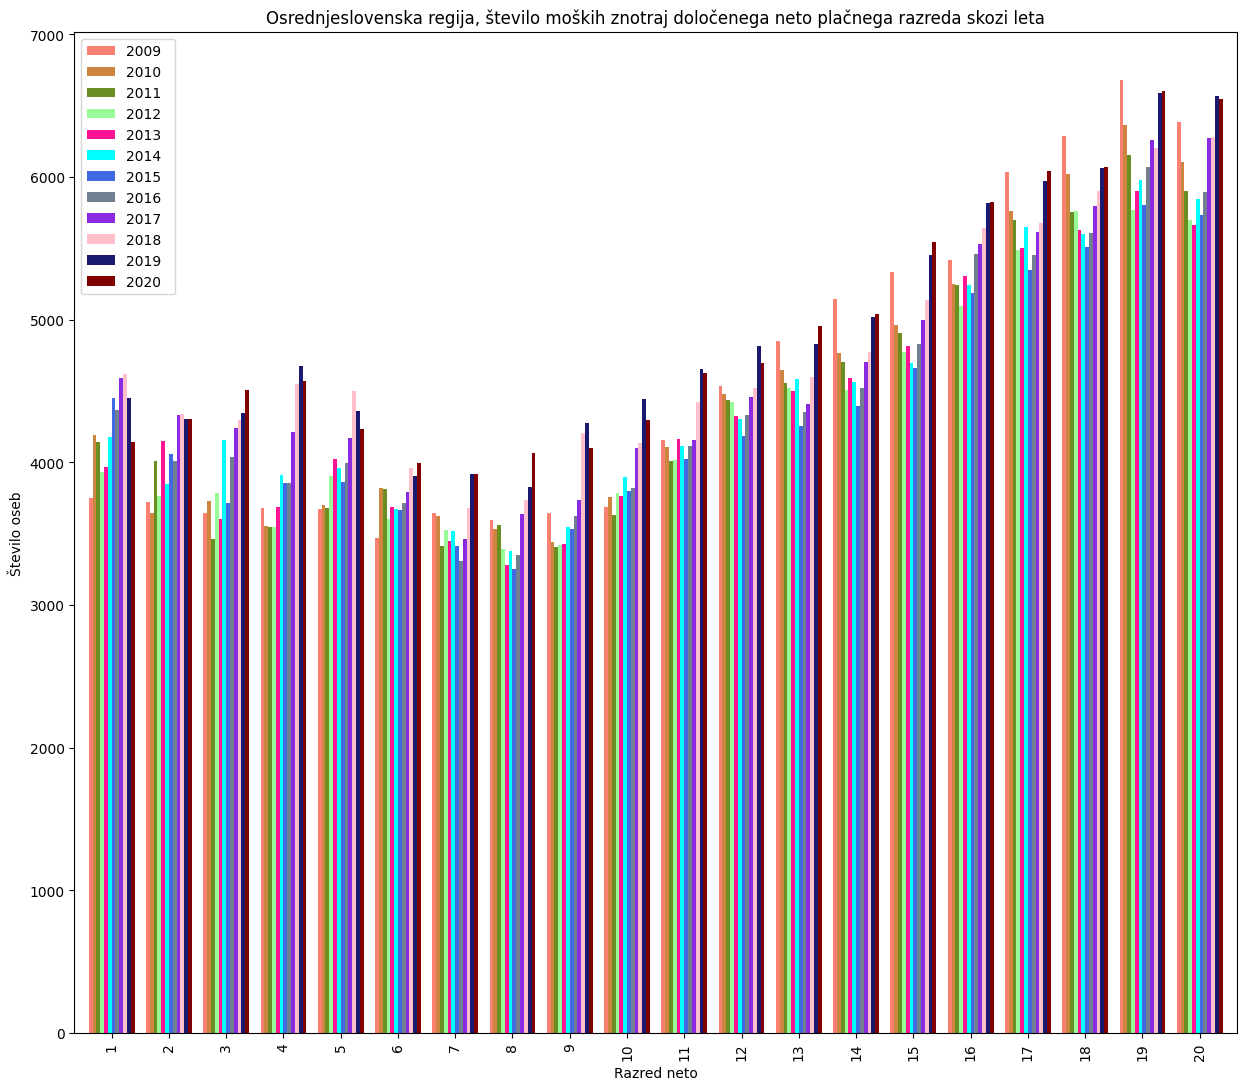

In [24]:
neto_razredi = neto_placa.filter(like="RAZRED NETO")
# Izberemo zgolj ustrezne stolpce
zenske_osrednjeslovenska = neto_placa.loc[:, neto_placa.columns.str.contains('OSREDNJESLOVENSKA') & neto_placa.columns.str.contains('ZENSKE')]
# Za lepše poimenovanje legende pri grafu odstranimo nepotrebno besedilo iz imen stolpcev
zenske_osrednjeslovenska = zenske_osrednjeslovenska.rename(columns=lambda x: x.replace('ZENSKE', ''))
zenske_osrednjeslovenska = zenske_osrednjeslovenska.rename(columns=lambda x: x.replace('OSREDNJESLOVENSKA', ''))

ax = zenske_osrednjeslovenska.plot(kind='bar', figsize=(15, 13), width = 0.8, color = ["salmon", "peru", "olivedrab", "palegreen", "deeppink"
                                                                            , "aqua", "royalblue", "slategray", "blueviolet",
                                                                            "pink", "midnightblue", "maroon"])
ax.set_xticklabels(neto_razredi['RAZRED NETO'])
plt.xlabel('Razred neto')
plt.ylabel('Število oseb')
plt.title("Osrednjeslovenska regija, število moških znotraj določenega neto plačnega razreda skozi leta")
plt.show()

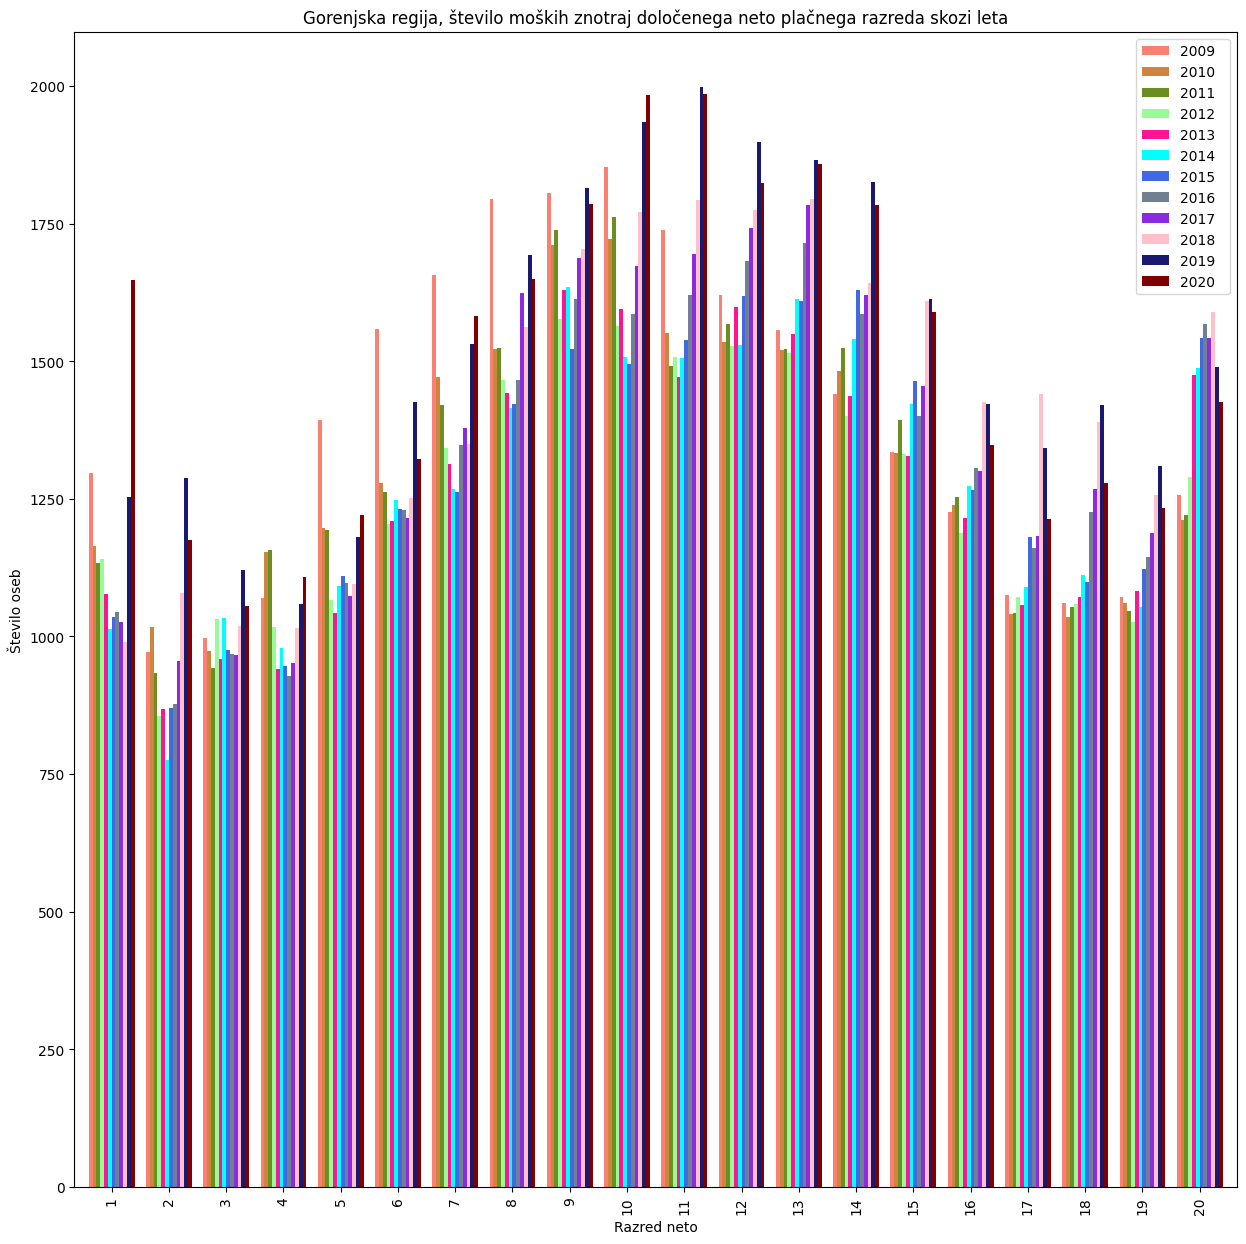

In [25]:
neto_razredi = neto_placa.filter(like="RAZRED NETO")
# Izberemo zgolj ustrezne stolpce
moski_gorenjska = neto_placa.loc[:, neto_placa.columns.str.contains('GORENJSKA') & neto_placa.columns.str.contains('MOSKI')]
# Za lepše poimenovanje legende pri grafu odstranimo nepotrebno besedilo iz imen stolpcev
moski_gorenjska = moski_gorenjska.rename(columns=lambda x: x.replace('MOSKI', ''))
moski_gorenjska = moski_gorenjska.rename(columns=lambda x: x.replace('GORENJSKA', ''))

ax = moski_gorenjska.plot(kind='bar', figsize=(15, 15), width = 0.8, color = ["salmon", "peru", "olivedrab", "palegreen", "deeppink"
                                                                            , "aqua", "royalblue", "slategray", "blueviolet",
                                                                            "pink", "midnightblue", "maroon"])
ax.set_xticklabels(neto_razredi['RAZRED NETO'])
plt.xlabel('Razred neto')
plt.ylabel('Število oseb')
plt.title("Gorenjska regija, število moških znotraj določenega neto plačnega razreda skozi leta")
plt.show()

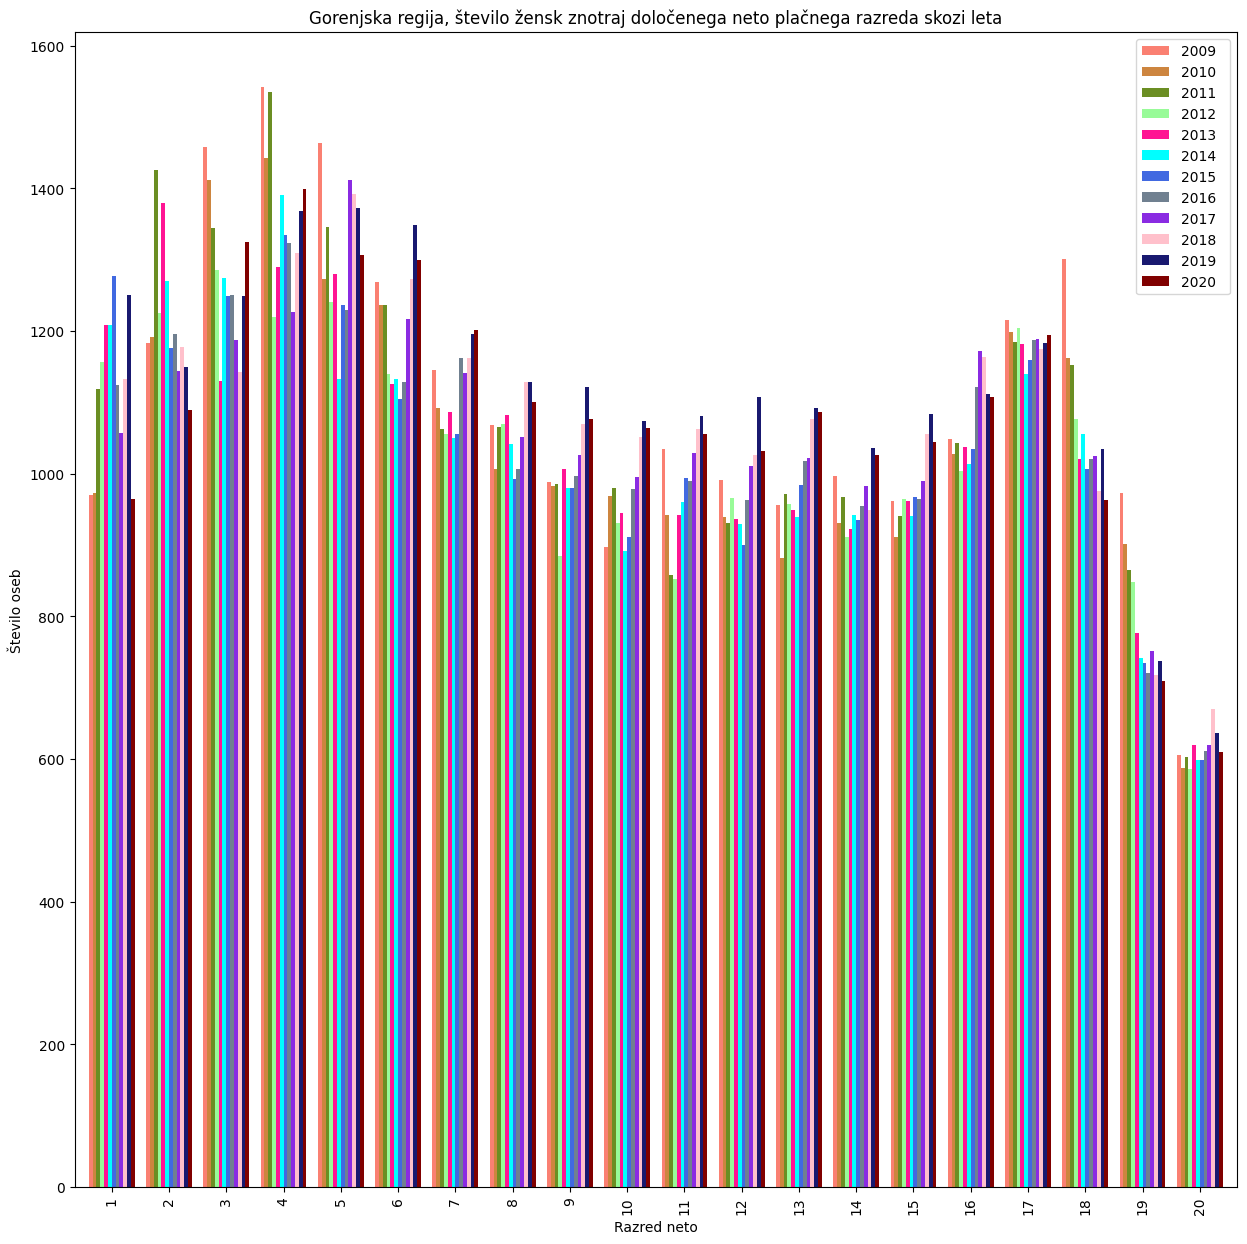

In [26]:
neto_razredi = neto_placa.filter(like="RAZRED NETO")
# Izberemo zgolj ustrezne stolpce
zenske_gorenjska = neto_placa.loc[:, neto_placa.columns.str.contains('GORENJSKA') & neto_placa.columns.str.contains('ZENSKE')]
# Za lepše poimenovanje legende pri grafu odstranimo nepotrebno besedilo iz imen stolpcev
zenske_gorenjska = zenske_gorenjska.rename(columns=lambda x: x.replace('ZENSKE', ''))
zenske_gorenjska = zenske_gorenjska.rename(columns=lambda x: x.replace('GORENJSKA', ''))

ax = zenske_gorenjska.plot(kind='bar', figsize=(15, 15), width = 0.8, color = ["salmon", "peru", "olivedrab", "palegreen", "deeppink"
                                                                            , "aqua", "royalblue", "slategray", "blueviolet",
                                                                            "pink", "midnightblue", "maroon"])
ax.set_xticklabels(neto_razredi['RAZRED NETO'])
plt.xlabel('Razred neto')
plt.ylabel('Število oseb')
plt.title("Gorenjska regija, število žensk znotraj določenega neto plačnega razreda skozi leta")
plt.show()

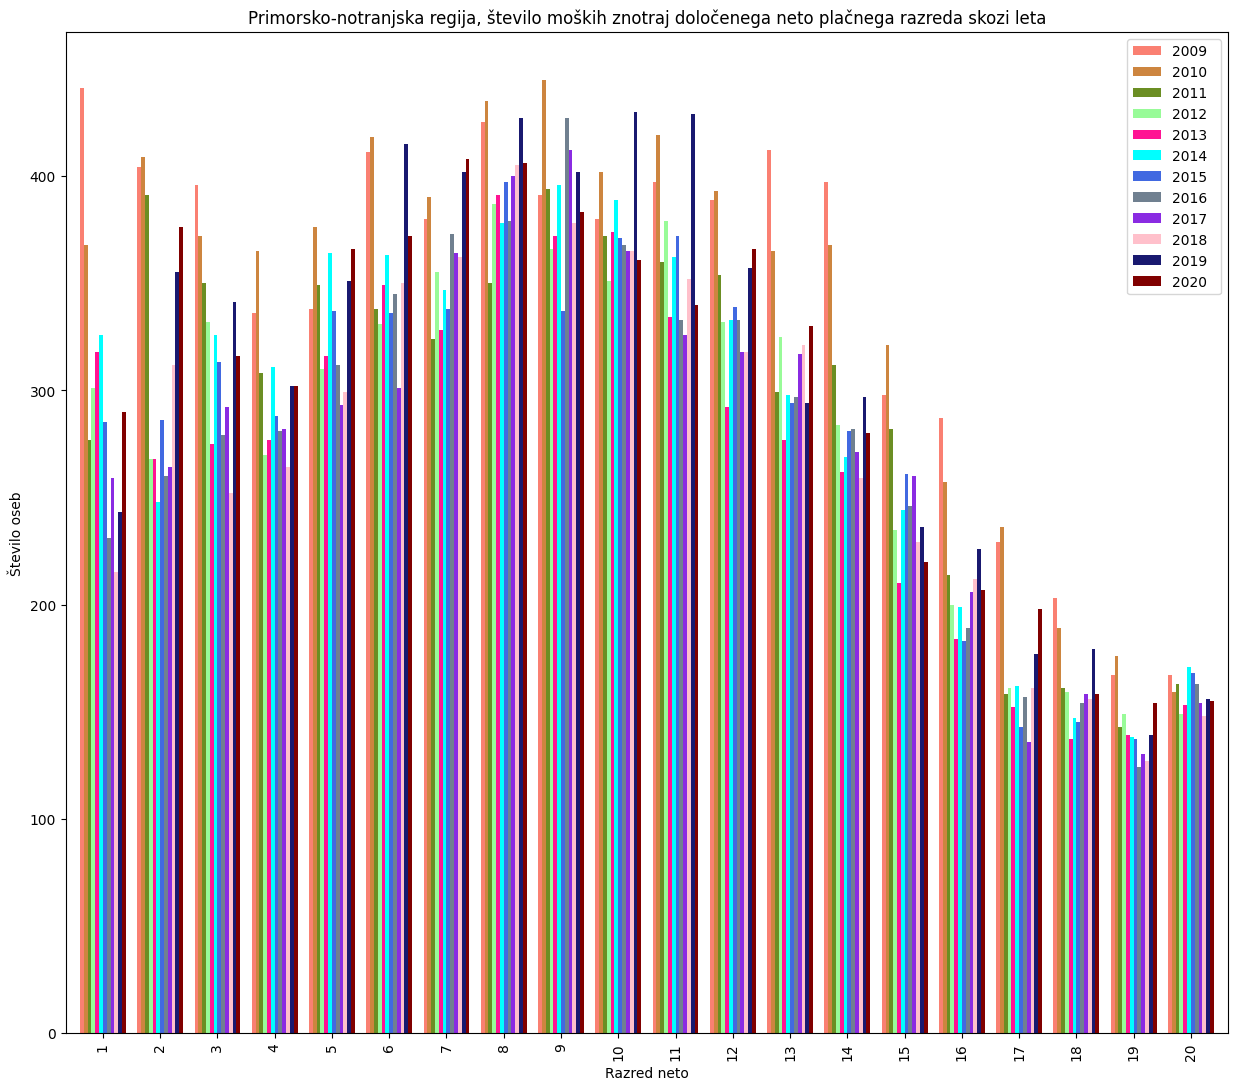

In [27]:
neto_razredi = neto_placa.filter(like="RAZRED NETO")
# Izberemo zgolj ustrezne stolpce
moski_primorsko_notranjska = neto_placa.loc[:, neto_placa.columns.str.contains('PRIMORSKO-NOTRANJSKA') & neto_placa.columns.str.contains('MOSKI')]
# Za lepše poimenovanje legende pri grafu odstranimo nepotrebno besedilo iz imen stolpcev
moski_primorsko_notranjska = moski_primorsko_notranjska.rename(columns=lambda x: x.replace('MOSKI', ''))
moski_primorsko_notranjska = moski_primorsko_notranjska.rename(columns=lambda x: x.replace('PRIMORSKO-NOTRANJSKA', ''))

ax = moski_primorsko_notranjska.plot(kind='bar', figsize=(15, 13), width = 0.8, color = ["salmon", "peru", "olivedrab", "palegreen", "deeppink"
                                                                            , "aqua", "royalblue", "slategray", "blueviolet",
                                                                            "pink", "midnightblue", "maroon"])
ax.set_xticklabels(neto_razredi['RAZRED NETO'])
plt.xlabel('Razred neto')
plt.ylabel('Število oseb')
plt.title("Primorsko-notranjska regija, število moških znotraj določenega neto plačnega razreda skozi leta")
plt.show()

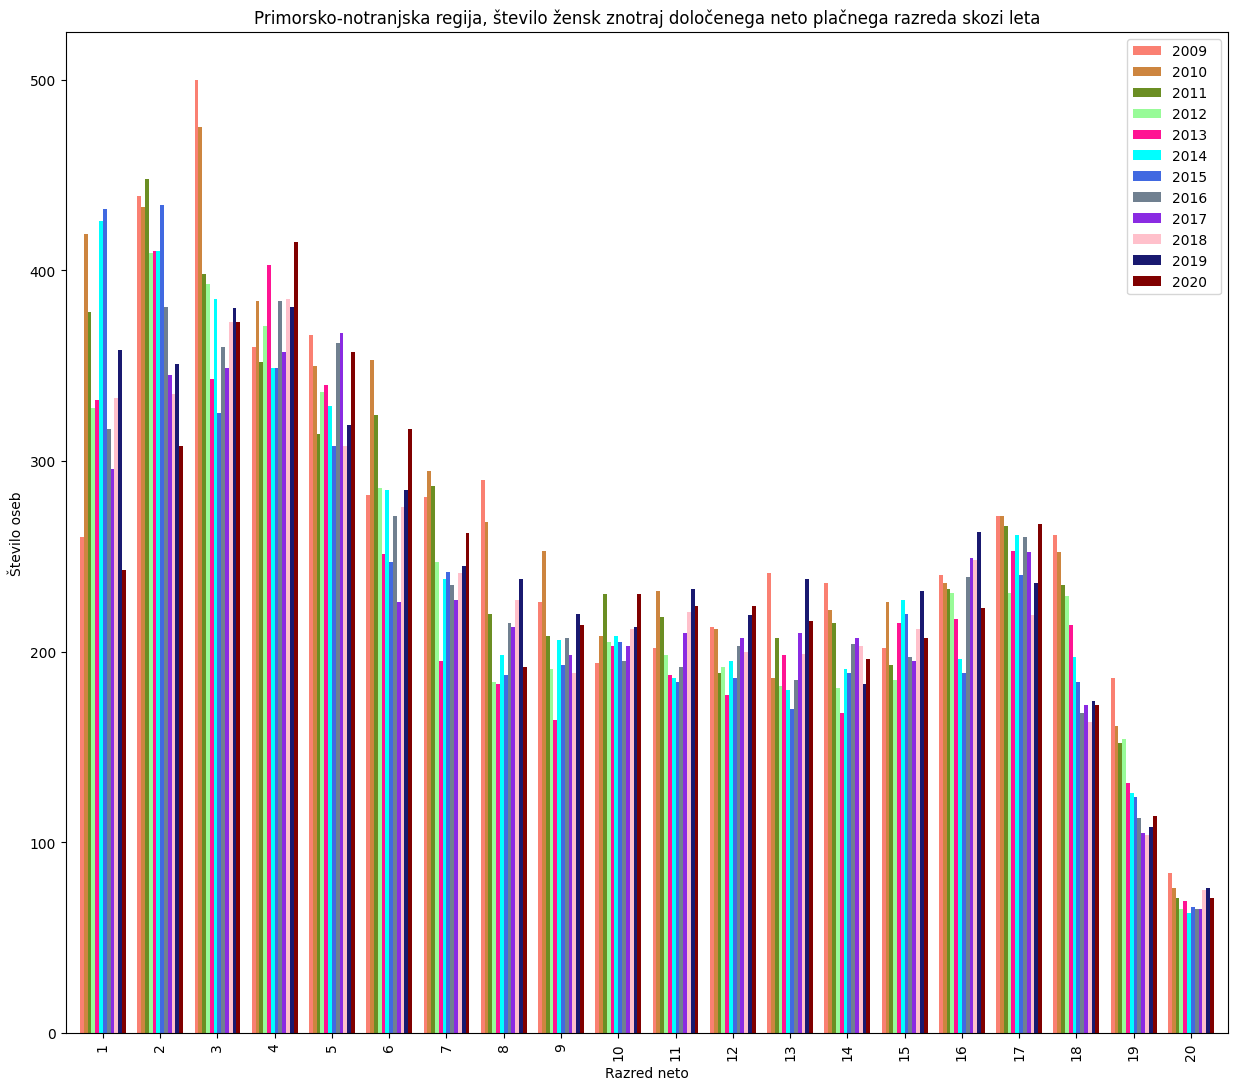

In [28]:
neto_razredi = neto_placa.filter(like="RAZRED NETO")
# Izberemo zgolj ustrezne stolpce
zenske_primorsko_notranjska = neto_placa.loc[:, neto_placa.columns.str.contains('PRIMORSKO-NOTRANJSKA') & neto_placa.columns.str.contains('ZENSKE')]
# Za lepše poimenovanje legende pri grafu odstranimo nepotrebno besedilo iz imen stolpcev
zenske_primorsko_notranjska = zenske_primorsko_notranjska.rename(columns=lambda x: x.replace('ZENSKE', ''))
zenske_primorsko_notranjska = zenske_primorsko_notranjska.rename(columns=lambda x: x.replace('PRIMORSKO-NOTRANJSKA', ''))

ax = zenske_primorsko_notranjska.plot(kind='bar', figsize=(15, 13), width = 0.8, color = ["salmon", "peru", "olivedrab", "palegreen", "deeppink"
                                                                            , "aqua", "royalblue", "slategray", "blueviolet",
                                                                            "pink", "midnightblue", "maroon"])
ax.set_xticklabels(neto_razredi['RAZRED NETO'])
plt.xlabel('Razred neto')
plt.ylabel('Število oseb')
plt.title("Primorsko-notranjska regija, število žensk znotraj določenega neto plačnega razreda skozi leta")
plt.show()

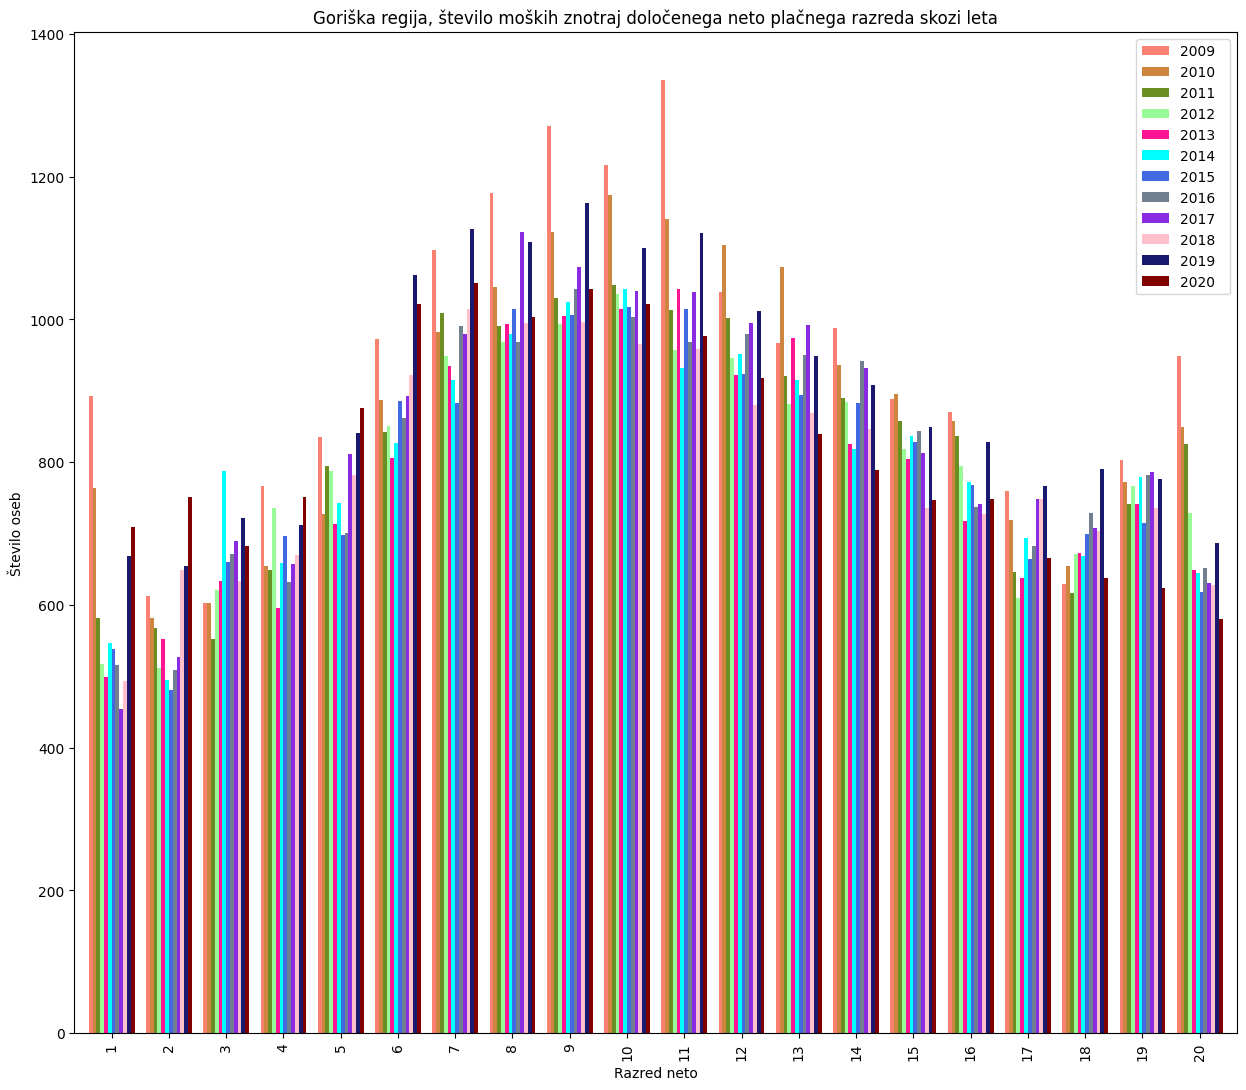

In [29]:
neto_razredi = neto_placa.filter(like="RAZRED NETO")
# Izberemo zgolj ustrezne stolpce
moski_goriska = neto_placa.loc[:, neto_placa.columns.str.contains('GORISKA') & neto_placa.columns.str.contains('MOSKI')]
# Za lepše poimenovanje legende pri grafu odstranimo nepotrebno besedilo iz imen stolpcev
moski_goriska = moski_goriska.rename(columns=lambda x: x.replace('MOSKI', ''))
moski_goriska = moski_goriska.rename(columns=lambda x: x.replace('GORISKA', ''))

ax = moski_goriska.plot(kind='bar', figsize=(15, 13), width = 0.8, color = ["salmon", "peru", "olivedrab", "palegreen", "deeppink"
                                                                            , "aqua", "royalblue", "slategray", "blueviolet",
                                                                            "pink", "midnightblue", "maroon"])
ax.set_xticklabels(neto_razredi['RAZRED NETO'])
plt.xlabel('Razred neto')
plt.ylabel('Število oseb')
plt.title("Goriška regija, število moških znotraj določenega neto plačnega razreda skozi leta")
plt.show()

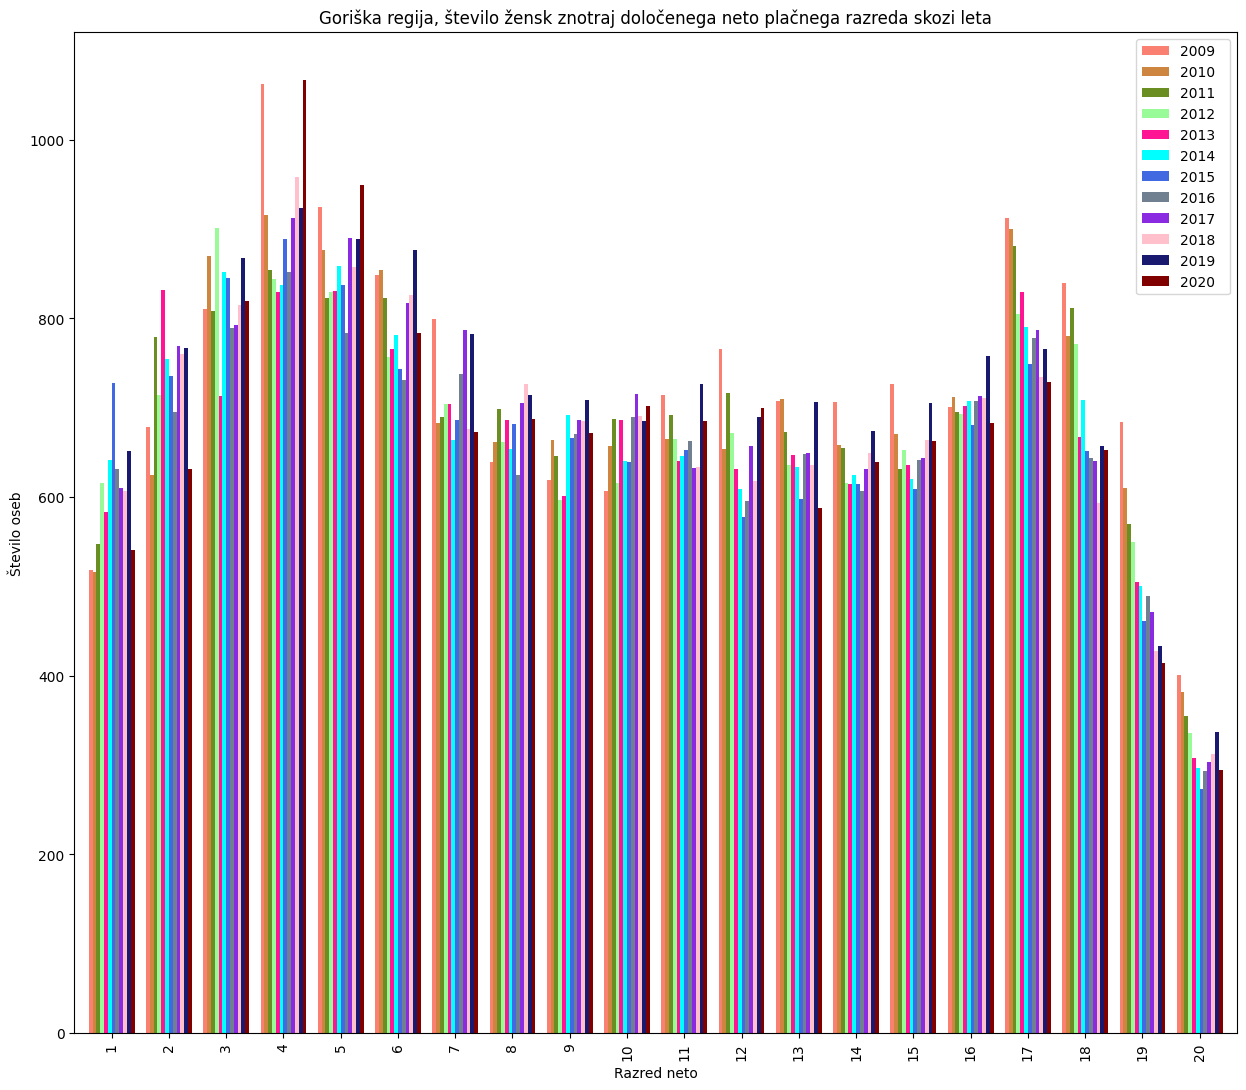

In [30]:
neto_razredi = neto_placa.filter(like="RAZRED NETO")
# Izberemo zgolj ustrezne stolpce
zenske_goriska = neto_placa.loc[:, neto_placa.columns.str.contains('GORISKA') & neto_placa.columns.str.contains('ZENSKE')]
# Za lepše poimenovanje legende pri grafu odstranimo nepotrebno besedilo iz imen stolpcev
zenske_goriska = zenske_goriska.rename(columns=lambda x: x.replace('ZENSKE', ''))
zenske_goriska = zenske_goriska.rename(columns=lambda x: x.replace('GORISKA', ''))

ax = zenske_goriska.plot(kind='bar', figsize=(15, 13), width = 0.8, color = ["salmon", "peru", "olivedrab", "palegreen", "deeppink"
                                                                            , "aqua", "royalblue", "slategray", "blueviolet",
                                                                            "pink", "midnightblue", "maroon"])
ax.set_xticklabels(neto_razredi['RAZRED NETO'])
plt.xlabel('Razred neto')
plt.ylabel('Število oseb')
plt.title("Goriška regija, število žensk znotraj določenega neto plačnega razreda skozi leta")
plt.show()

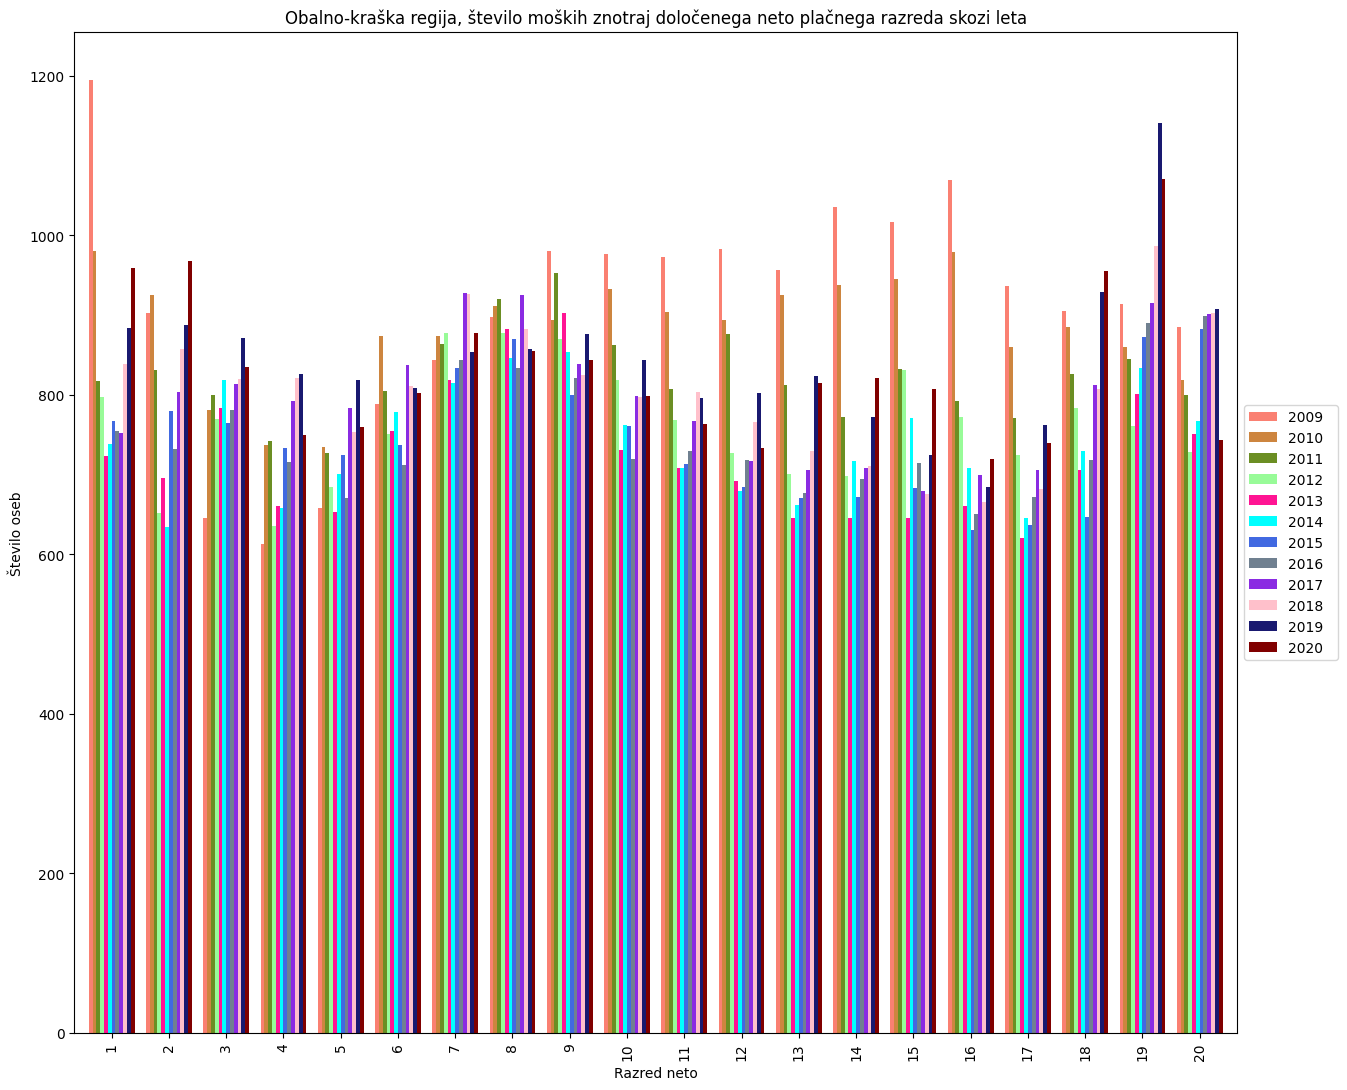

In [31]:
neto_razredi = neto_placa.filter(like="RAZRED NETO")
# Izberemo zgolj ustrezne stolpce
moski_obalno_kraska = neto_placa.loc[:, neto_placa.columns.str.contains('OBALNO-KRASKA') & neto_placa.columns.str.contains('MOSKI')]
# Za lepše poimenovanje legende pri grafu odstranimo nepotrebno besedilo iz imen stolpcev
moski_obalno_kraska = moski_obalno_kraska.rename(columns=lambda x: x.replace('MOSKI', ''))
moski_obalno_kraska = moski_obalno_kraska.rename(columns=lambda x: x.replace('OBALNO-KRASKA', ''))

ax = moski_obalno_kraska.plot(kind='bar', figsize=(15, 13), width = 0.8, color = ["salmon", "peru", "olivedrab", "palegreen", "deeppink"
                                                                            , "aqua", "royalblue", "slategray", "blueviolet",
                                                                            "pink", "midnightblue", "maroon"])
ax.set_xticklabels(neto_razredi['RAZRED NETO'])
plt.xlabel('Razred neto')
plt.ylabel('Število oseb')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Obalno-kraška regija, število moških znotraj določenega neto plačnega razreda skozi leta")
plt.show()

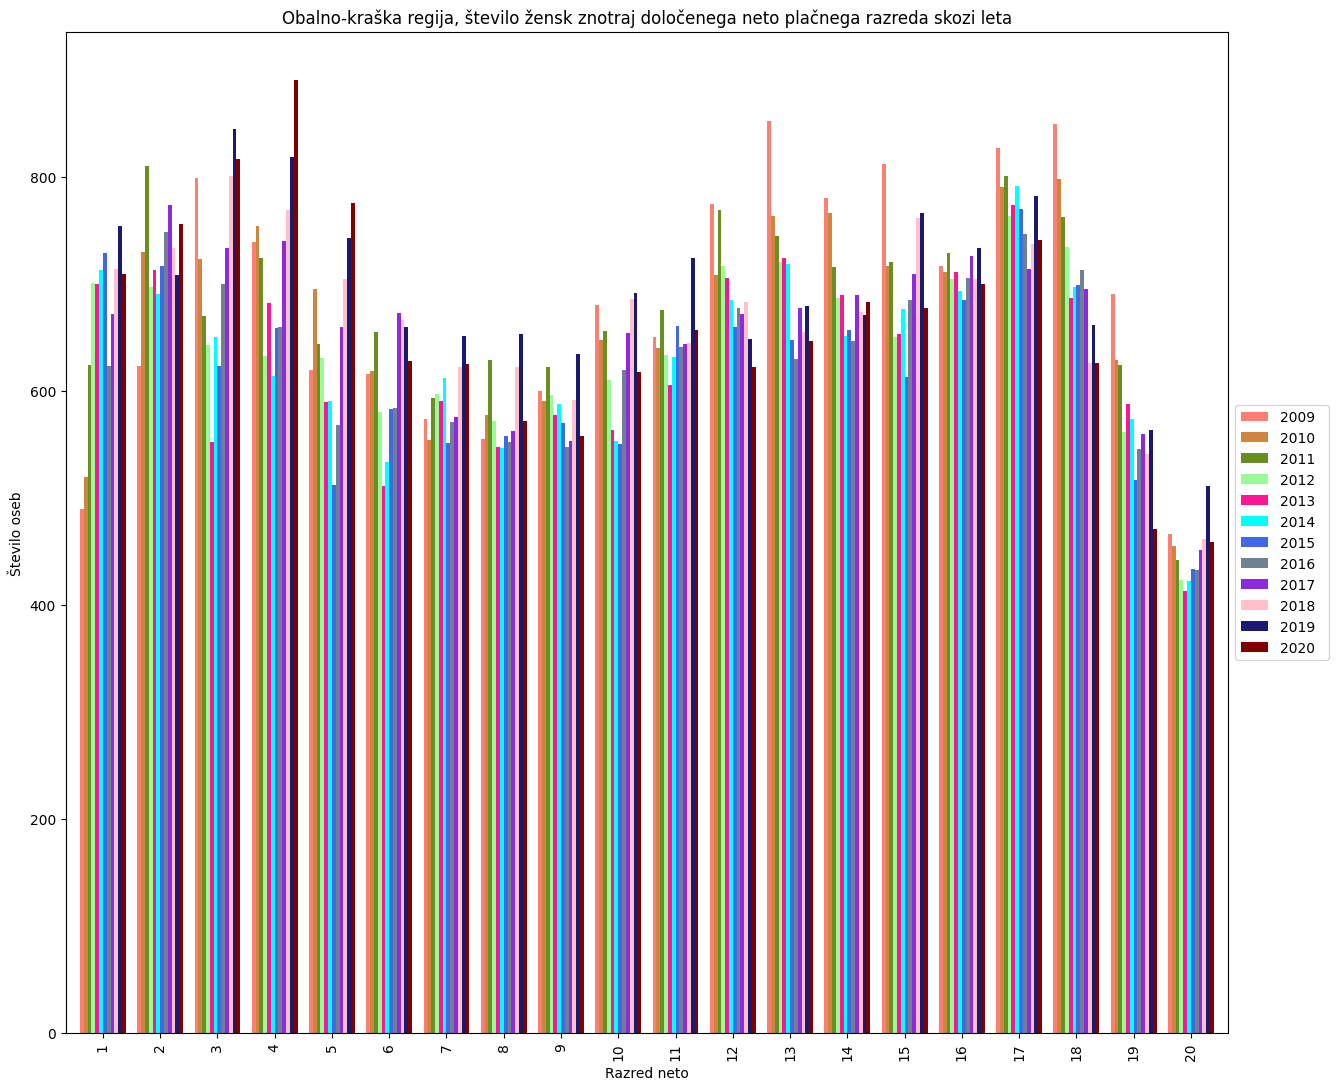

In [32]:
neto_razredi = neto_placa.filter(like="RAZRED NETO")
# Izberemo zgolj ustrezne stolpce
zenske_obalno_kraska = neto_placa.loc[:, neto_placa.columns.str.contains('OBALNO-KRASKA') & neto_placa.columns.str.contains('ZENSKE')]
# Za lepše poimenovanje legende pri grafu odstranimo nepotrebno besedilo iz imen stolpcev
zenske_obalno_kraska = zenske_obalno_kraska.rename(columns=lambda x: x.replace('ZENSKE', ''))
zenske_obalno_kraska = zenske_obalno_kraska.rename(columns=lambda x: x.replace('OBALNO-KRASKA', ''))

ax = zenske_obalno_kraska.plot(kind='bar', figsize=(15, 13), width = 0.8, color = ["salmon", "peru", "olivedrab", "palegreen", "deeppink"
                                                                            , "aqua", "royalblue", "slategray", "blueviolet",
                                                                            "pink", "midnightblue", "maroon"])
ax.set_xticklabels(neto_razredi['RAZRED NETO'])
plt.xlabel('Razred neto')
plt.ylabel('Število oseb')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Obalno-kraška regija, število žensk znotraj določenega neto plačnega razreda skozi leta")
plt.show()